# <b>Project - Ensemble Learning Techniques - AIML - Aishik Sengupta</b>

--------------


## <b><u>Data Description & Context</u></b> :
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.
Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician



## <b><u>Domain</u></b> :
Medicine



## <b><u>Attribute Information</u></b> :

<b>name</b>      : ASCII subject name and recording number<br>
<b>MDVP:Fo(Hz)</b>      : Average vocal fundamental frequency<br>
<b>MDVP:Fhi(Hz)</b>      : Maximum vocal fundamental frequency<br>
<b>MDVP:Flo(Hz)</b> : Minimum vocal fundamental frequency<br>
<b>MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP</b>   : Several
measures of variation in fundamental frequency<br>
<b>MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA</b>   : Several measures of variation in amplitude<br>
<b>NHR,HNR</b>  : Two measures of ratio of noise to tonal components in the voice<br>
<b>status</b>      : Health status of the subject (one) - Parkinson's, (zero) - healthy<br>
<b>RPDE,D2</b>      : Two nonlinear dynamical complexity measures <br>
<b>DFA</b>      : Signal fractal scaling exponent<br>
<b>spread1,spread2,PPE</b> : Three nonlinear measures of fundamental frequency<br>




## <b><u>Learning Outcomes</u></b>:

<ul>
    <li>Exploratory Data Analysis</li>
    <li>Supervised Learning</li>
    <li>Ensemble Learning</li>
</ul>


## <b><u>Objective</u></b> :

Goal is to classify the patients into the respective labels using the attributes from their voice recordings



## <b><u>Steps and tasks</u></b>:

<ol>
    <li>Load the dataset</li>
    <li>It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of records, structure of the file, number of attributes,
Proprietary content. ©Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited
types of attributes and a general idea of likely challenges in the dataset. Mention a few comments in this regard (5 points)</li>
    <li>Using univariate & bivariate analysis to check the individual attributes for their basic statistics such as central values, spread, tails, relationships between variables etc. mention your observations (15 points)</li>
    <li>Split the dataset into training and test set in the ratio of 70:30 (Training:Test) (5 points)</li>
    <li>Prepare the data for training - Scale the data if necessary, get rid of missing values (if any) etc (5 points)</li>
    <li>Train at least 3 standard classification algorithms - Logistic Regression, Naive Bayes’, SVM, k-NN etc, and note down their accuracies on the test data (10 points)</li>
    <li>Train a meta-classifier and note the accuracy on test data (10 points)</li>
    <li>Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy (10 points)</li>
    <li>Compare all the models (minimum 5) and pick the best one among them (10 points)</li>
</ol>
<br>
<br>
<br>
<br>
<br>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics # to get various evauation metrics
from sklearn.metrics import roc_auc_score # receiver operating curve score

from sklearn.metrics import accuracy_score # accuracy of prediction score
from sklearn.metrics import recall_score # recall score
from sklearn.metrics import precision_score # precision score
from sklearn.metrics import f1_score # f1 score
from sklearn.metrics import roc_auc_score # receiver operating curve score

from sklearn import model_selection # package to select model from 
from sklearn.model_selection import train_test_split # function to split data into train and test
from sklearn.preprocessing import StandardScaler # Using standard scaling using variance and standard deviation
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression # Logistic Regression function
from sklearn.neighbors import KNeighborsClassifier## KNN function
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
from sklearn.svm import SVC # for support vector machine classification
from sklearn.ensemble import StackingClassifier # for meta classifier

from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
# Reading the data to load onto a DataFrame
pd_data = pd.read_csv('Data - Parkinsons')

In [15]:
# Saving the data onto a csv file to take a better look at the data
pd_data.to_csv('Parkinsons.csv')

In [3]:
# Having a look at the head section of the file containing 10 records of patients with Parkinsons disease
pd_data.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [4]:
# Having a look at the head section of the file containing 10 records of patients with No Parkinsons disease
pd_data.tail(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
185,phon_R01_S49_3,116.286,177.291,96.983,0.00314,0.00003,0.00134,0.00192,0.00403,0.01564,...,0.02001,0.00737,24.199,0,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
186,phon_R01_S49_4,116.556,592.030,86.228,0.00496,0.00004,0.00254,0.00263,0.00762,0.01660,...,0.02460,0.01397,23.958,0,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605
187,phon_R01_S49_5,116.342,581.289,94.246,0.00267,0.00002,0.00115,0.00148,0.00345,0.01300,...,0.01892,0.00680,25.023,0,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
188,phon_R01_S49_6,114.563,119.167,86.647,0.00327,0.00003,0.00146,0.00184,0.00439,0.01185,...,0.01672,0.00703,24.775,0,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777
189,phon_R01_S50_1,201.774,262.707,78.228,0.00694,0.00003,0.00412,0.00396,0.01235,0.02574,...,0.04363,0.04441,19.368,0,0.508479,0.683761,-6.934474,0.159890,2.316346,0.112838
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [5]:
# get the information of the data frame, type and data type of values
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [6]:
# To get the dimensions of the data frame
pd_data.shape

(195, 24)

In [7]:
# Statistical Summary of the data frame
pd_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [8]:
# To check the amount of data present for patients with Parkinsons disease and without Parkinsons disease
pd_data.status.value_counts(normalize=True)

1    0.753846
0    0.246154
Name: status, dtype: float64

## By eye-balling raw data to get a feel of the data

<ul>
    <li>There are 195 records present from 31 patients , of whom 23 have Parkinson's Disease. About 6 recordings per patient is available to us.
    </li>
    <li>We have 24 features per record. First record is identified as the name of the patient along the recording number, perhaps suggesting the nth test number of the study with same patient to extract parameters of general voice disorders.
    </li>
    <li>We can identify the healthy patients from the patients having Parkinsons disease through the Status column, 0 for healthy and 1 for Parkinsons. This is our target attribute/feature.
    </li>
    <li>The name column is a string data type, status is an integer data type and all the other columns are float data type pertaining to values of general voice doisorders
    </li>
    <li>Most of them are floating point integers between 0 and 1. The 'spread' columns are floating point integers in both positive and negative scale.
    </li>
    <li>The dataset file given to us has no extension, thus it is simply a file type.
    </li>
    <li>There are no null values
    </li>
    <li>The maximum vocal fundamental frequency value of healthy patients is higher than those of PD patients
    </li>
    <li>Conversely, the minimum vocal fundamental frequency value of healthy patients is lower than those of PD patients. The range is higher among healthy patients.
    </li>
    <li>The average vocal fundamental frequency of healthy patients is higher than PD patients.
    </li>
    <li>The columns of data describing Jitter is almost similar for both PD and healthy patients. 
    </li>
    <li>The columns of data describing Shimmer is slightly higher in case of PD patients than in healthy patients.
    </li>
    <li>The MDVP:RAP and MDVP:PPQ values are similar both cases of patients, so are the NHR and HNR values.
    </li>
    <li>The DFA values are higher for PD patients than healthy ones
    </li>
    <li>There are various measures of non-linear data.
    </li>
</ul>

## Challenges

<ul>
    <li>Most independent features dont have any units.
    </li>
    <li>I think scaling will be necessary and it will be a challenge.
    </li>
    <li>Multidimensional voice program analysis (MDVP) is used to for the diagnosis of vocal cord dysfunction. Need to understand the relationship between the features by analyzing.
    </li>
    <li>Overfitting might be an issue with only 195 records provided.
    </li>
</ul>

<br>

## Exploratory Data Analysis

### Univariate Analysis

### Vocal Fundamental Frequencies

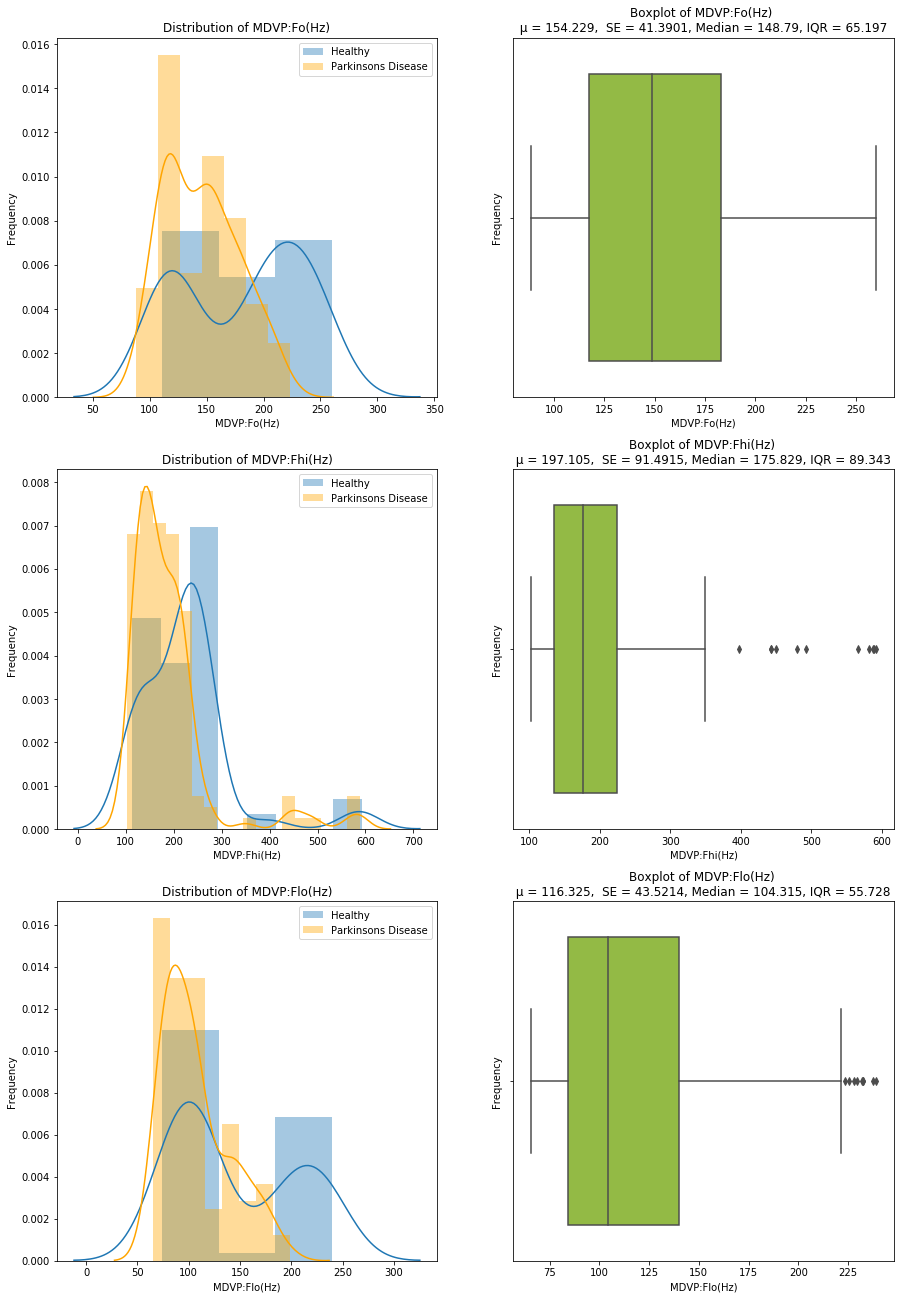

In [68]:
plt.figure(figsize = (15,22.5))

#To check on the fundamental frequency data
cols = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']

i=0 # column counter 
j=1 # plot counter

while i < len(cols):
    if j % 2 != 0:
        plt.subplot(3,2,j)
        sns.distplot(pd_data[pd_data['status'] == 0][cols[i]],  label='Healthy')
        sns.distplot(pd_data[pd_data['status'] == 1][cols[i]], color = 'orange',  label='Parkinson''s Disease')
        j+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        plt.legend()
    else:
        plt.subplot(3,2,j)
        sns.boxplot(pd_data[cols[i]], color='yellowgreen')
        j+=1
        q1, q3 = np.percentile(pd_data[cols[i]],[25,75])
        IQR = q3 - q1 
        plt.title(f'Boxplot of {cols[i]} \n \u03bc = {round(pd_data[cols[i]].mean(), 3)},  SE = {round(pd_data[cols[i]].std(),4)}, Median = {round(pd_data[cols[i]].median(),3)}, IQR = {round(IQR, 3)} ')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        i+=1


<ul>
    <li>Here, the lowest, highest and average vocal fundamental frequencies data is mapped out.
    </li>
    <li>The range of values for average and lowest frequencies are almost same.
    </li>
    <li>Healthy people have bimodal distribution, with values ranging from 100 to 300 Hz. Most Parkinson's disease people have values ranging from 100 to 200 Hz. This is a good indication of the difference.
    </li>
</ul>

### Several measures of variation in fundamental frequency

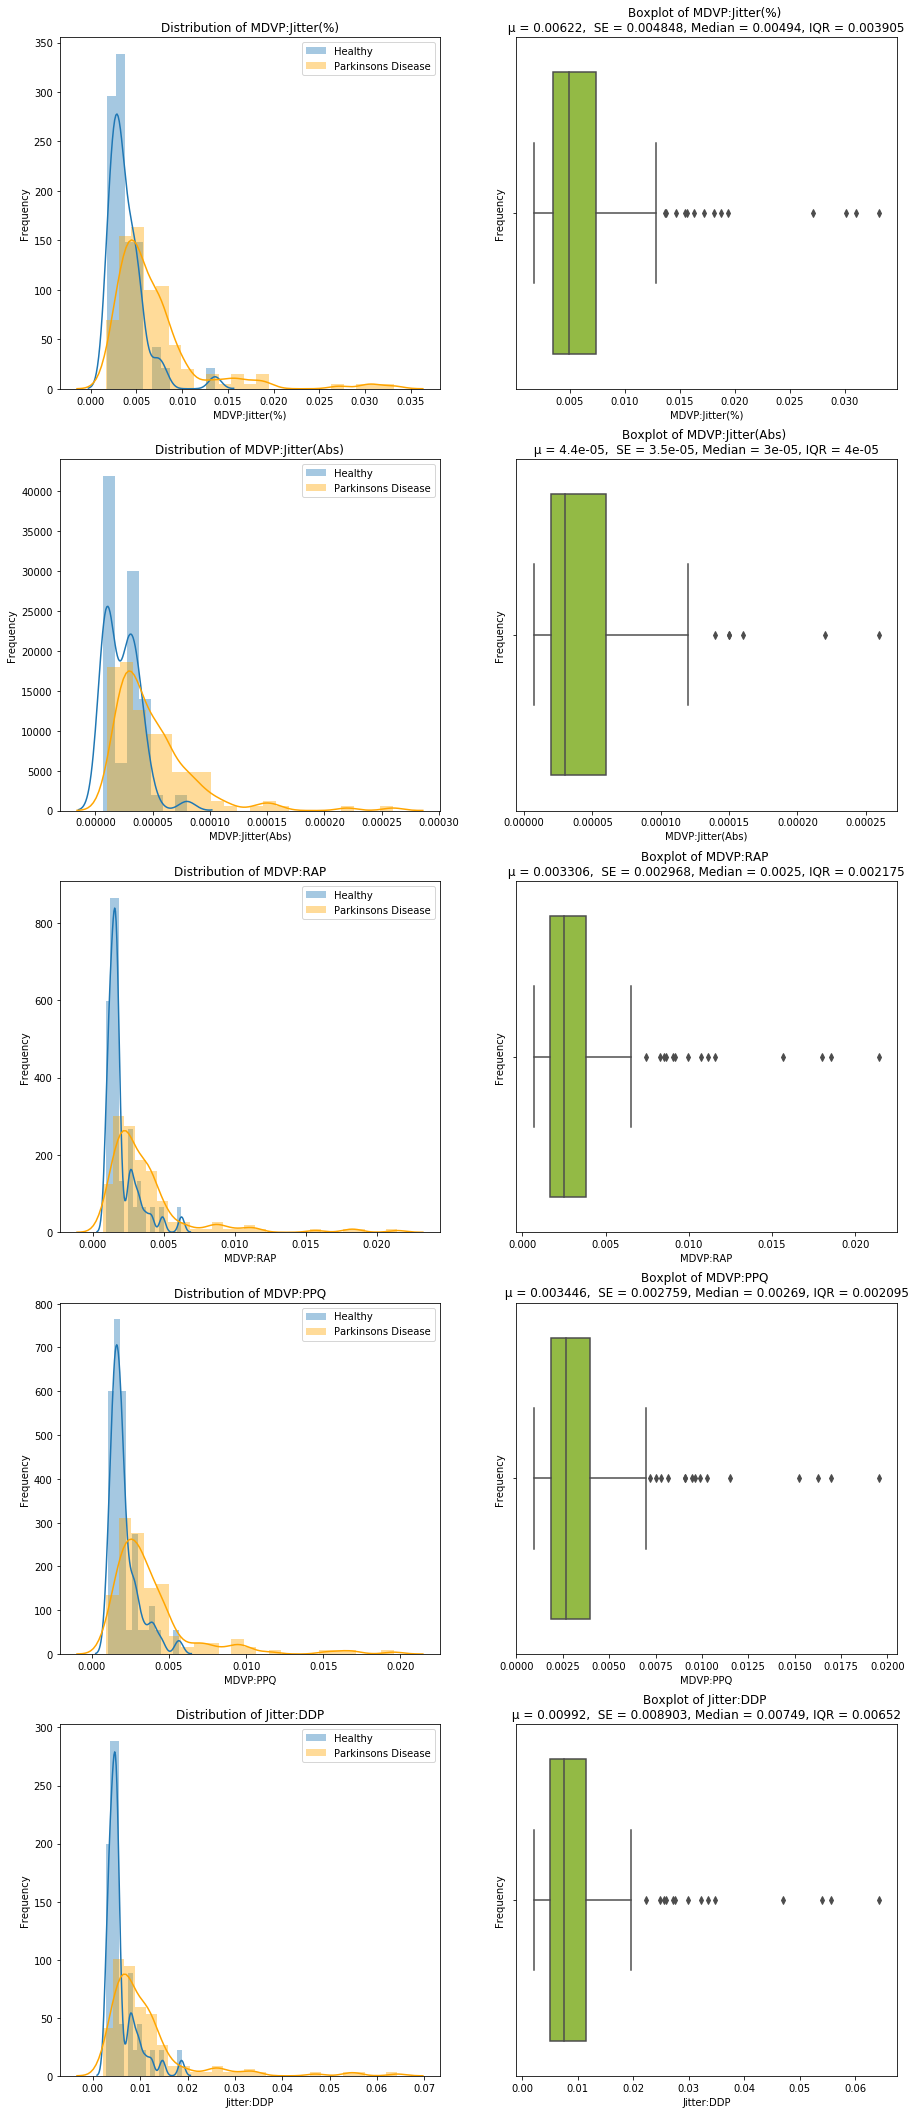

In [69]:
plt.figure(figsize = (15,37.5))

#To check on the Several measures of variation in fundamental frequency
cols = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP']

i=0 # column counter 
j=1 # plot counter

while i < len(cols):
    if j % 2 != 0:
        plt.subplot(5,2,j)
        sns.distplot(pd_data[pd_data['status'] == 0][cols[i]],  label='Healthy')
        sns.distplot(pd_data[pd_data['status'] == 1][cols[i]], color = 'orange',  label='Parkinson''s Disease')
        j+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        plt.legend()
    else:
        plt.subplot(5,2,j)
        sns.boxplot(pd_data[cols[i]], color='yellowgreen')
        j+=1
        q1, q3 = np.percentile(pd_data[cols[i]],[25,75])
        IQR = q3 - q1
        plt.title(f'Boxplot of {cols[i]} \n \u03bc = {round(pd_data[cols[i]].mean(), 6)},  SE = {round(pd_data[cols[i]].std(),6)}, Median = {round(pd_data[cols[i]].median(),6)}, IQR = {round(IQR, 6)} ')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        i+=1

<ul>
    <li>These data have outliers here.The data is right-skewed.
    </li>
    <li>Parkinson's disease people have a very high data spread. Healthy people have most of their data concentrated in the lower range
    </li>
    <li>The outliers are the data from Parkinson's disease people.
    </li>
</ul>
    

### Several measures of variation in amplitude

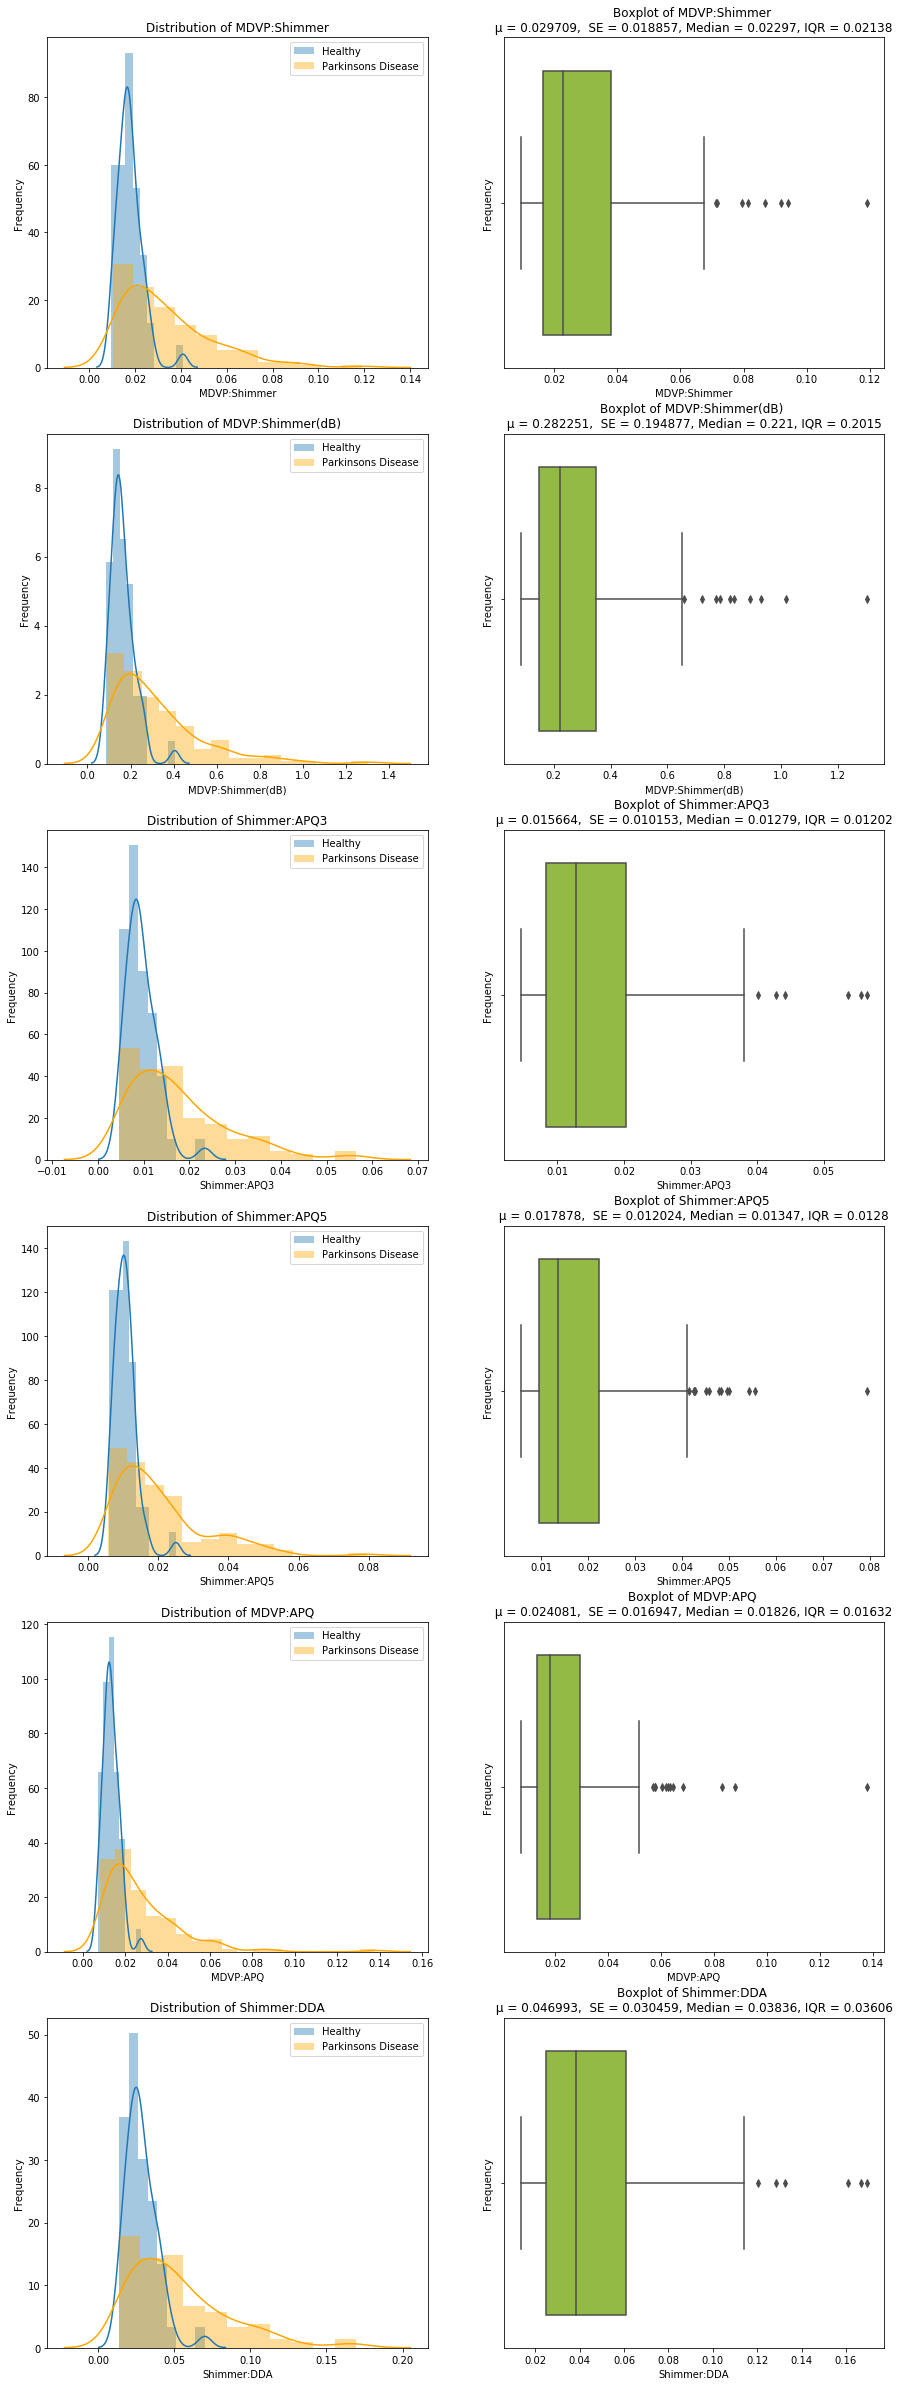

In [70]:
plt.figure(figsize = (15,42.5))

#To check on the Several measures of variation in amplitude
cols = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA']

i=0 # column counter 
j=1 # plot counter

while i < len(cols):
    if j % 2 != 0:
        plt.subplot(6,2,j)
        sns.distplot(pd_data[pd_data['status'] == 0][cols[i]],  label='Healthy')
        sns.distplot(pd_data[pd_data['status'] == 1][cols[i]], color = 'orange',  label='Parkinson''s Disease')
        j+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        plt.legend()
    else:
        plt.subplot(6,2,j)
        sns.boxplot(pd_data[cols[i]], color='yellowgreen')
        j+=1
        q1, q3 = np.percentile(pd_data[cols[i]],[25,75])
        IQR = q3 - q1
        plt.title(f'Boxplot of {cols[i]} \n \u03bc = {round(pd_data[cols[i]].mean(), 6)},  SE = {round(pd_data[cols[i]].std(),6)}, Median = {round(pd_data[cols[i]].median(),6)}, IQR = {round(IQR, 6)} ')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        i+=1

<ul>
    <li>Here also the outliers are due to Parkinson's disease people. Data is highly skewed to the right.
    </li>
    <li>Parkinson's disease people have a very high data spread. Healthy people have most of their data concentrated in the lower range
    </li>
</ul>
    

### Measures of ratio of noise to tonal components in the voice

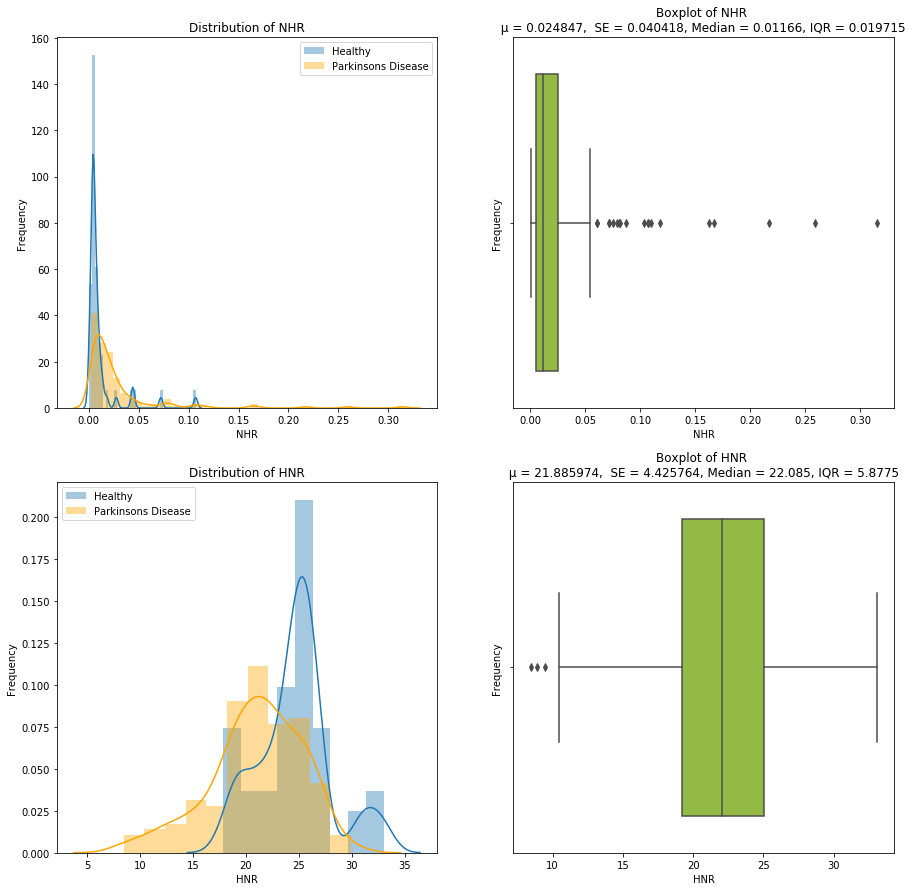

In [71]:
plt.figure(figsize = (15,15))

#To check on the Measures of ratio of noise to tonal components in the voice
cols = ['NHR','HNR']

i=0 # column counter 
j=1 # plot counter

while i < len(cols):
    if j % 2 != 0:
        plt.subplot(2,2,j)
        sns.distplot(pd_data[pd_data['status'] == 0][cols[i]],  label='Healthy')
        sns.distplot(pd_data[pd_data['status'] == 1][cols[i]], color = 'orange',  label='Parkinson''s Disease')
        j+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        plt.legend()
    else:
        plt.subplot(2,2,j)
        sns.boxplot(pd_data[cols[i]], color='yellowgreen')
        j+=1
        q1, q3 = np.percentile(pd_data[cols[i]],[25,75])
        IQR = q3 - q1
        plt.title(f'Boxplot of {cols[i]} \n \u03bc = {round(pd_data[cols[i]].mean(), 6)},  SE = {round(pd_data[cols[i]].std(),6)}, Median = {round(pd_data[cols[i]].median(),6)}, IQR = {round(IQR, 6)} ')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        i+=1

<ul>
    <li>NHR data is highly skewed to the right. The outliers contain data from both Healthy and Parkinson's disease people, but mostly from PD people.
    </li>
    <li>PD people data is spread out , while Healthy people data is concentrated in the lower region in NHR.
    </li>
    <li>HNR data is highly skewed to the left. Only 3 outliers from PD people.
    </li>
    <li>PD people data is spread out while HD people have most data concentrated around 25 HNR.
    </li>
    <li>It is a pattern here that PD people have a high data spread while HD people have overlapping concentrated data.
    </li>
</ul>

### Health status of the subject (one) - Parkinson's, (zero) - healthy

Text(0.5, 0, 'Having Parkinsons Disease ?')

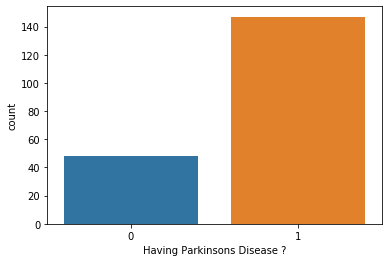

In [50]:
# simply gives data distribution of Healthy and Parkinson's disease people
sns.countplot(pd_data['status'],label="Count")
plt.xlabel('Having Parkinsons Disease ?')

### Measures of nonlinear dynamical complexity

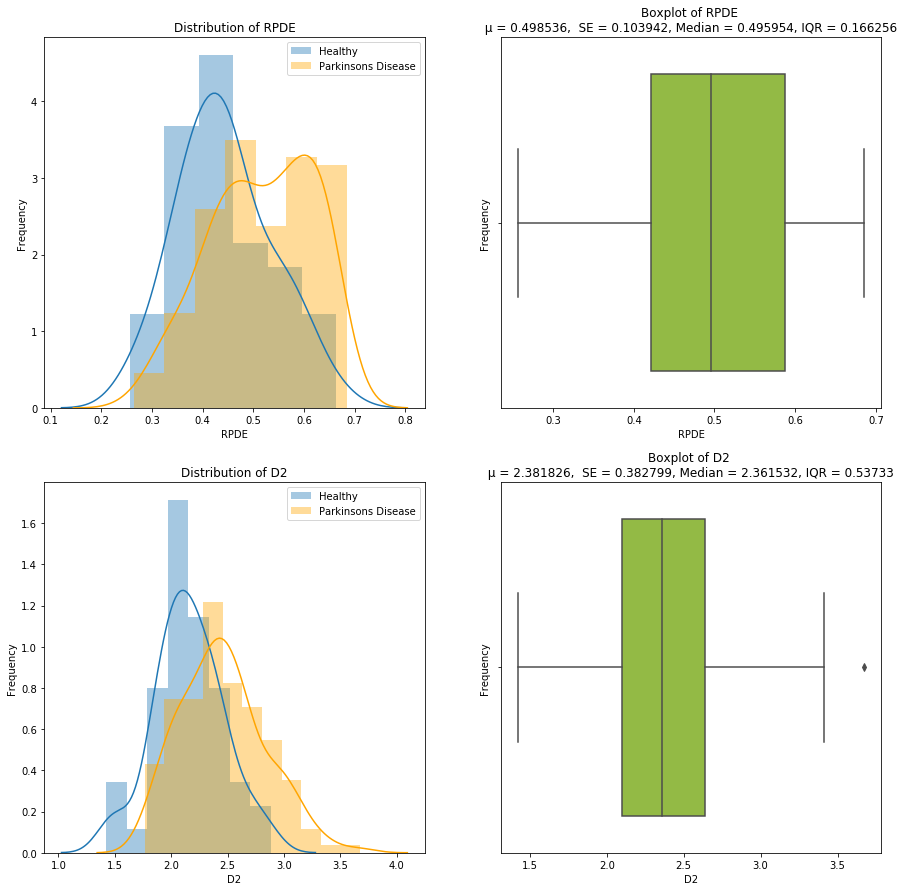

In [72]:
plt.figure(figsize = (15,15))

#To check on the Measures of nonlinear dynamical complexity
cols = ['RPDE','D2']

i=0 # column counter 
j=1 # plot counter

while i < len(cols):
    if j % 2 != 0:
        plt.subplot(2,2,j)
        sns.distplot(pd_data[pd_data['status'] == 0][cols[i]],  label='Healthy')
        sns.distplot(pd_data[pd_data['status'] == 1][cols[i]], color = 'orange',  label='Parkinson''s Disease')
        j+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        plt.legend()
    else:
        plt.subplot(2,2,j)
        sns.boxplot(pd_data[cols[i]], color='yellowgreen')
        j+=1
        q1, q3 = np.percentile(pd_data[cols[i]],[25,75])
        IQR = q3 - q1
        plt.title(f'Boxplot of {cols[i]} \n \u03bc = {round(pd_data[cols[i]].mean(), 6)},  SE = {round(pd_data[cols[i]].std(),6)}, Median = {round(pd_data[cols[i]].median(),6)}, IQR = {round(IQR, 6)} ')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        i+=1

<ul>
    <li>Both data is almost normally distributed. Both PD and HD people have overlapping data with each other.
    </li>
    <li>The RPDE data range is almost similar for both cases of patients.
    </li>
    <li>The D2 data range is almost similar for both, with HD people on the lower side and PD people on a bit higher side.
    </li>
</ul>

### Signal fractal scaling exponent

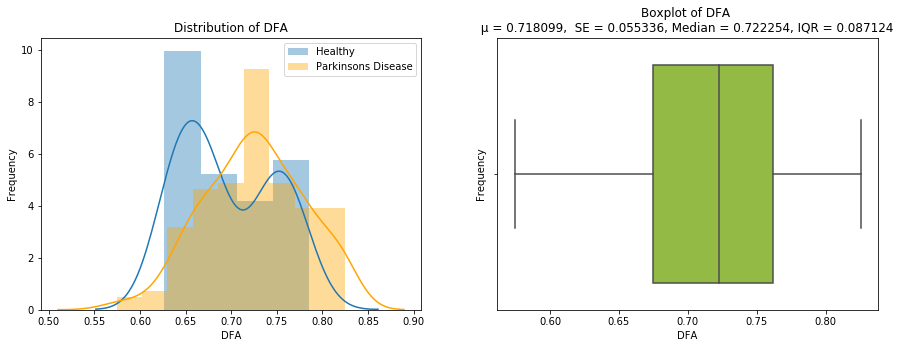

In [73]:
plt.figure(figsize = (15,5))
#To check on the Signal fractal scaling exponent
cols = ['DFA']

i=0 # column counter 
j=1 # plot counter

while i < len(cols):
    if j % 2 != 0:
        plt.subplot(1,2,j)
        sns.distplot(pd_data[pd_data['status'] == 0][cols[i]],  label='Healthy')
        sns.distplot(pd_data[pd_data['status'] == 1][cols[i]], color = 'orange',  label='Parkinson''s Disease')
        j+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        plt.legend()
    else:
        plt.subplot(1,2,j)
        sns.boxplot(pd_data[cols[i]], color='yellowgreen')
        j+=1
        q1, q3 = np.percentile(pd_data[cols[i]],[25,75])
        IQR = q3 - q1
        plt.title(f'Boxplot of {cols[i]} \n \u03bc = {round(pd_data[cols[i]].mean(), 6)},  SE = {round(pd_data[cols[i]].std(),6)}, Median = {round(pd_data[cols[i]].median(),6)}, IQR = {round(IQR, 6)} ')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        i+=1

<ul>
    <li>HD people have bimodal distribution here with peaks at around 0.65 and 0.775 DFA values.
    </li>
    <li>PD people data is almost normal with the peak in between the bimodal peaks of HD people at around 0.725.
    </li>
</ul>

### Nonlinear measures of fundamental frequency variation

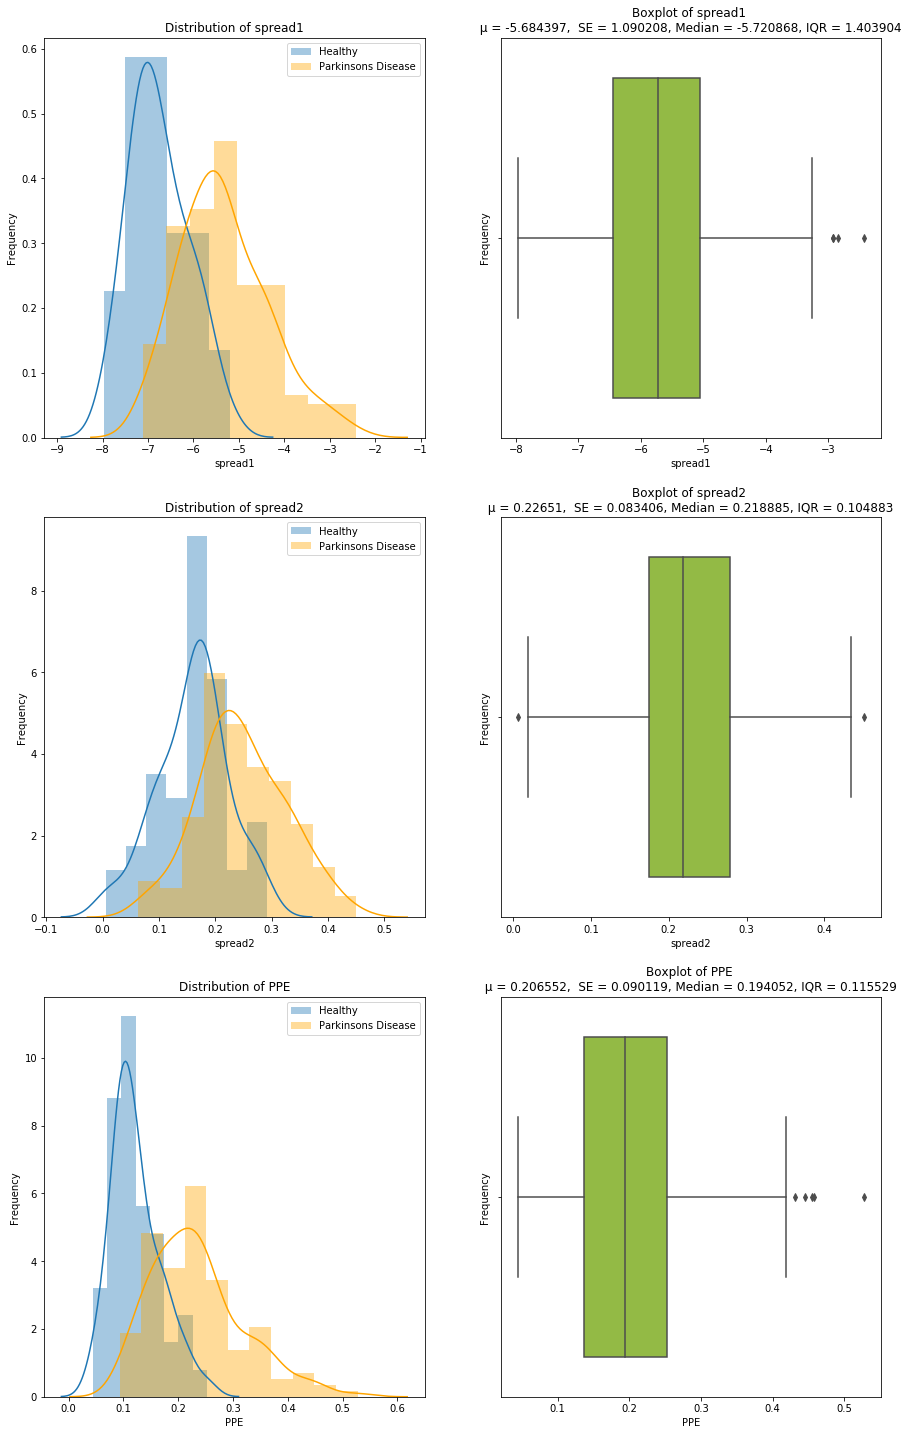

In [74]:
plt.figure(figsize = (15,25))

#To check on the Nonlinear measures of fundamental frequency variation
cols = ['spread1','spread2','PPE']

i=0 # column counter 
j=1 # plot counter

while i < len(cols):
    if j % 2 != 0:
        plt.subplot(3,2,j)
        sns.distplot(pd_data[pd_data['status'] == 0][cols[i]],  label='Healthy')
        sns.distplot(pd_data[pd_data['status'] == 1][cols[i]], color = 'orange',  label='Parkinson''s Disease')
        j+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        plt.legend()
    else:
        plt.subplot(3,2,j)
        sns.boxplot(pd_data[cols[i]], color='yellowgreen')
        j+=1
        q1, q3 = np.percentile(pd_data[cols[i]],[25,75])
        IQR = q3 - q1
        plt.title(f'Boxplot of {cols[i]} \n \u03bc = {round(pd_data[cols[i]].mean(), 6)},  SE = {round(pd_data[cols[i]].std(),6)}, Median = {round(pd_data[cols[i]].median(),6)}, IQR = {round(IQR, 6)} ')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        i+=1

<ul>
    <li>spread1 is right skewed. HD people data is more right skewed than PD people data.
    </li>
    <li>HD people have more values on the negative side of spread1 than PD people.
    </li>
    <li>spread2 is almost normal for both cases of patients.
    </li>
    <li>The peaks of both types of patients almost overlap with HD people data more towards the 0 for spread2.
    </li>
    <li>PPE data highly skewed to the right for both cases.
    </li>
    <li>HD people have their data towards 0 value in PPE than PD people.
    </li>
</ul>

<br>
<br>

### Bivariate Analysis

### Vocal Fundamental Frequencies

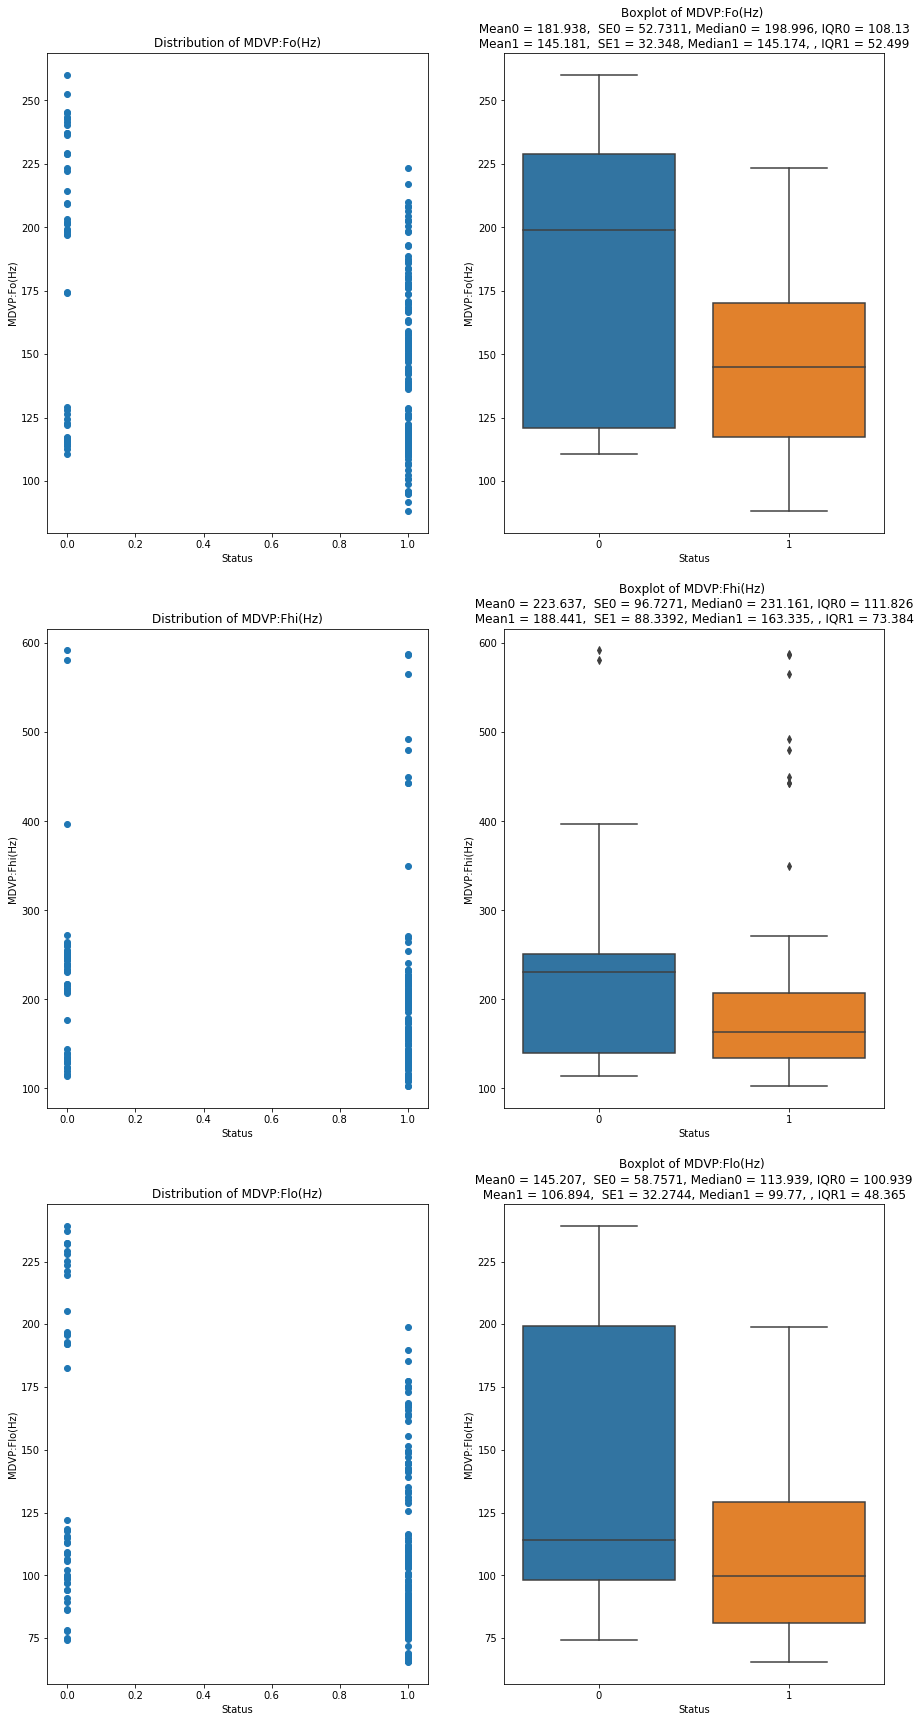

In [56]:


plt.figure(figsize = (15,30))

#To check on the fundamental frequency data
cols = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)']

i=0 # column counter 
j=1 # plot counter

while i < len(cols):
    if j % 2 != 0:
        plt.subplot(3,2,j)
        plt.scatter(x = pd_data['status'] ,y = pd_data[cols[i]])
        j+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel('Status')
        plt.ylabel(f'{cols[i]}')
    else:
        plt.subplot(3,2,j)
        sns.boxplot(x = pd_data.status,y = pd_data[cols[i]])
        j+=1
        q1, q3 = np.percentile(pd_data[pd_data.status == 0][cols[i]],[25,75])
        IQR0 = q3 - q1
        q1, q3 = np.percentile(pd_data[pd_data.status == 1][cols[i]],[25,75])
        IQR1 = q3 - q1
        plt.title(f'Boxplot of {cols[i]} \n Mean0 = {round(pd_data[pd_data.status == 0][cols[i]].mean(), 3)},  SE0 = {round(pd_data[pd_data.status == 0][cols[i]].std(),4)}, Median0 = {round(pd_data[pd_data.status == 0][cols[i]].median(),3)}, IQR0 = {round(IQR0,3)} \n Mean1 = {round(pd_data[pd_data.status == 1][cols[i]].mean(), 3)},  SE1 = {round(pd_data[pd_data.status == 1][cols[i]].std(),4)}, Median1 = {round(pd_data[pd_data.status == 1][cols[i]].median(),3)}, , IQR1 = {round(IQR1,3)} ')
        plt.xlabel('Status')
        plt.ylabel(f'{cols[i]}')
        i+=1


<ul>
    <li>HD people have a higher range of values for all three cases of vocal fundamental frequencies than PD people
    </li>

    
</ul>

### Several measures of variation in fundamental frequency

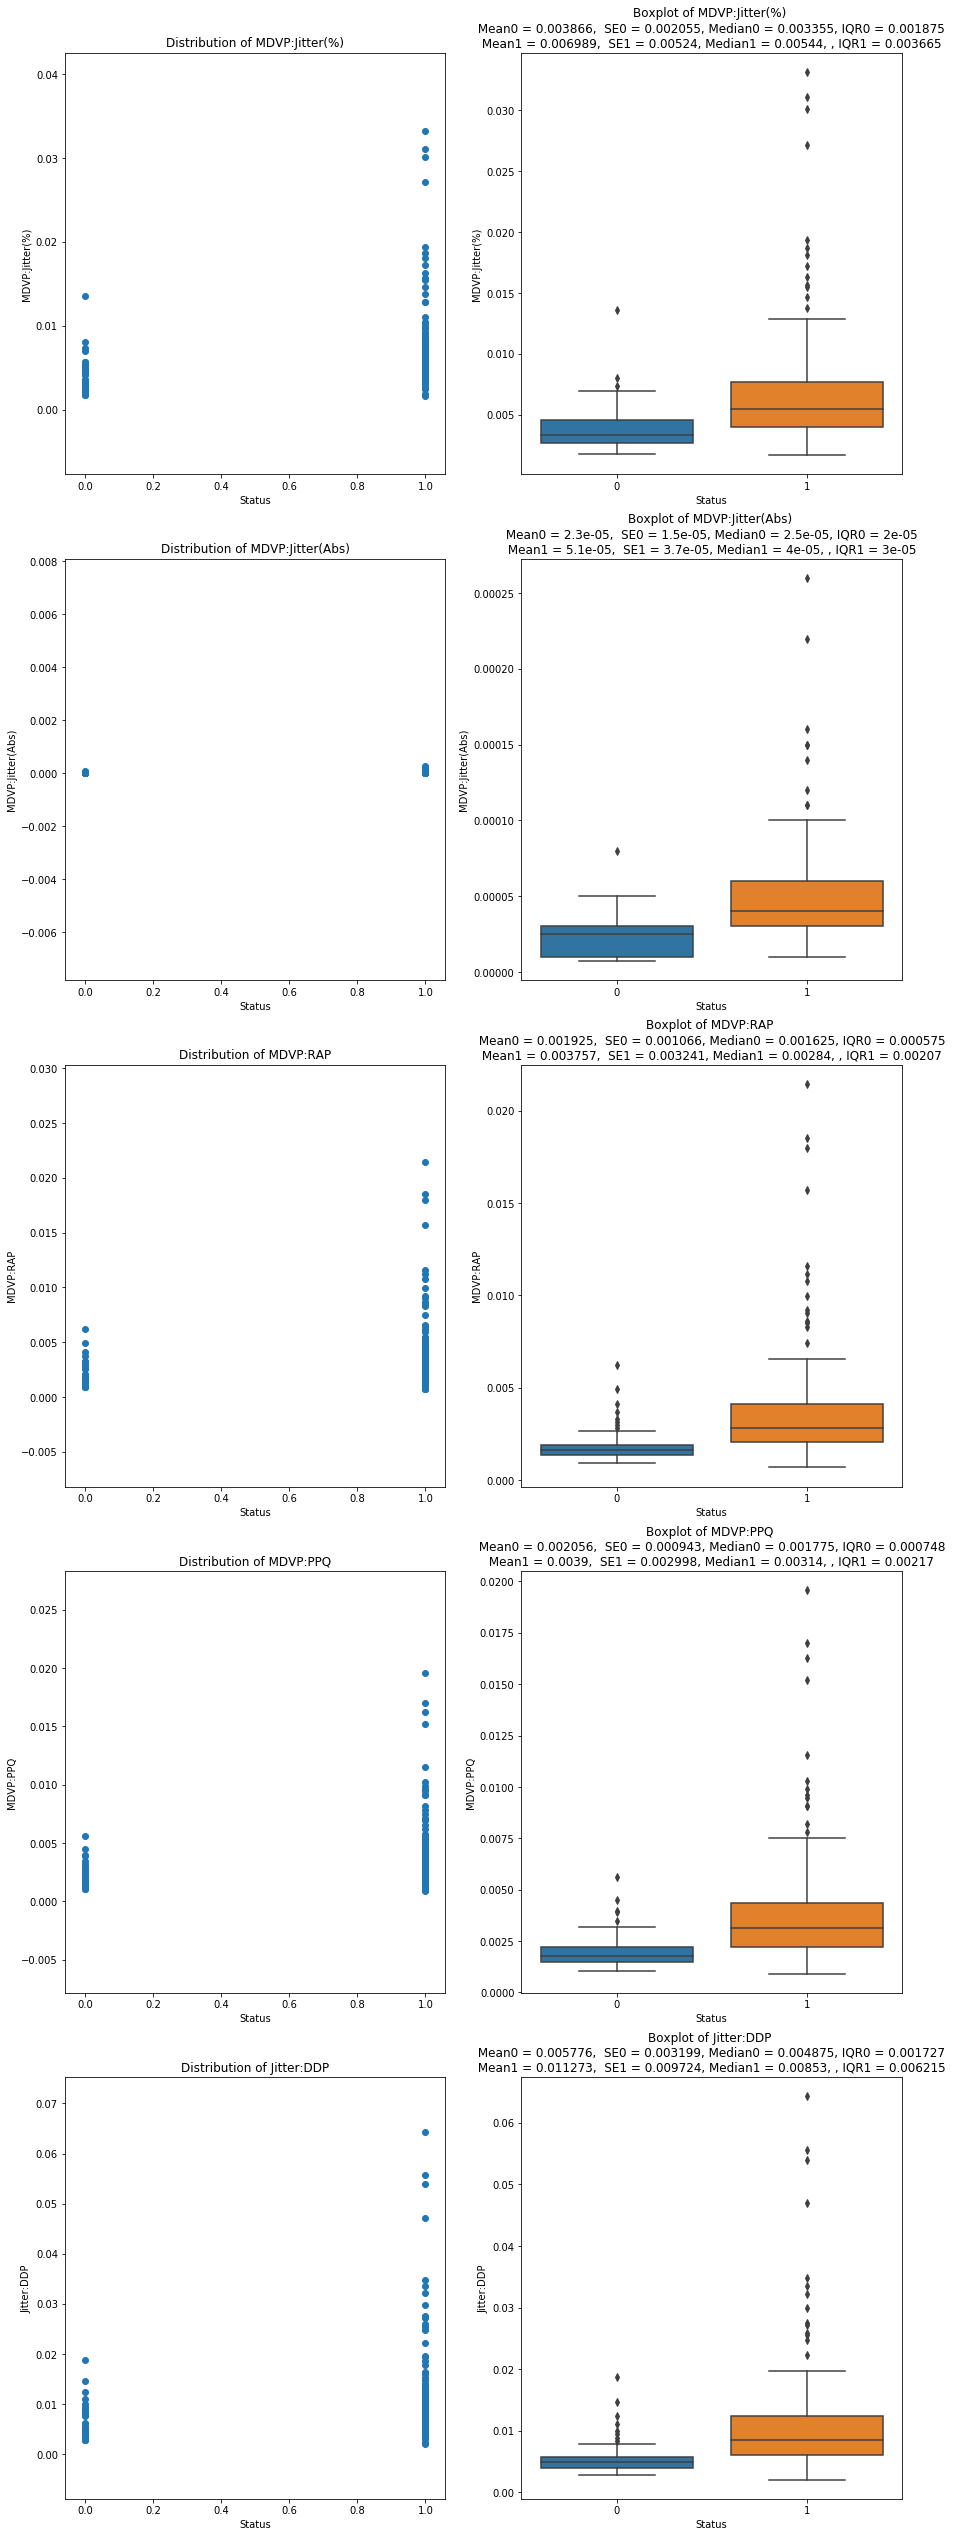

In [60]:
plt.figure(figsize = (15,45))

#To check on the Several measures of variation in fundamental frequency
cols = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ','Jitter:DDP']

i=0 # column counter 
j=1 # plot counter

while i < len(cols):
    if j % 2 != 0:
        plt.subplot(5,2,j)
        plt.scatter(x = pd_data['status'] ,y = pd_data[cols[i]])
        j+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel('Status')
        plt.ylabel(f'{cols[i]}')
    else:
        plt.subplot(5,2,j)
        sns.boxplot(x = pd_data.status,y = pd_data[cols[i]])
        j+=1
        q1, q3 = np.percentile(pd_data[pd_data.status == 0][cols[i]],[25,75])
        IQR0 = q3 - q1
        q1, q3 = np.percentile(pd_data[pd_data.status == 1][cols[i]],[25,75])
        IQR1 = q3 - q1
        plt.title(f'Boxplot of {cols[i]} \n Mean0 = {round(pd_data[pd_data.status == 0][cols[i]].mean(), 6)},  SE0 = {round(pd_data[pd_data.status == 0][cols[i]].std(),6)}, Median0 = {round(pd_data[pd_data.status == 0][cols[i]].median(),6)}, IQR0 = {round(IQR0,6)} \n Mean1 = {round(pd_data[pd_data.status == 1][cols[i]].mean(), 6)},  SE1 = {round(pd_data[pd_data.status == 1][cols[i]].std(),6)}, Median1 = {round(pd_data[pd_data.status == 1][cols[i]].median(),6)}, , IQR1 = {round(IQR1,6)} ')
        plt.xlabel('Status')
        plt.ylabel(f'{cols[i]}')
        i+=1

<ul>
    <li>Lower range of values and more towards the 0 in these cases indicates HD people. PD people clearly have a higher range and higher magnitude of values.
    </li>
    </ul>

### Several measures of variation in amplitude

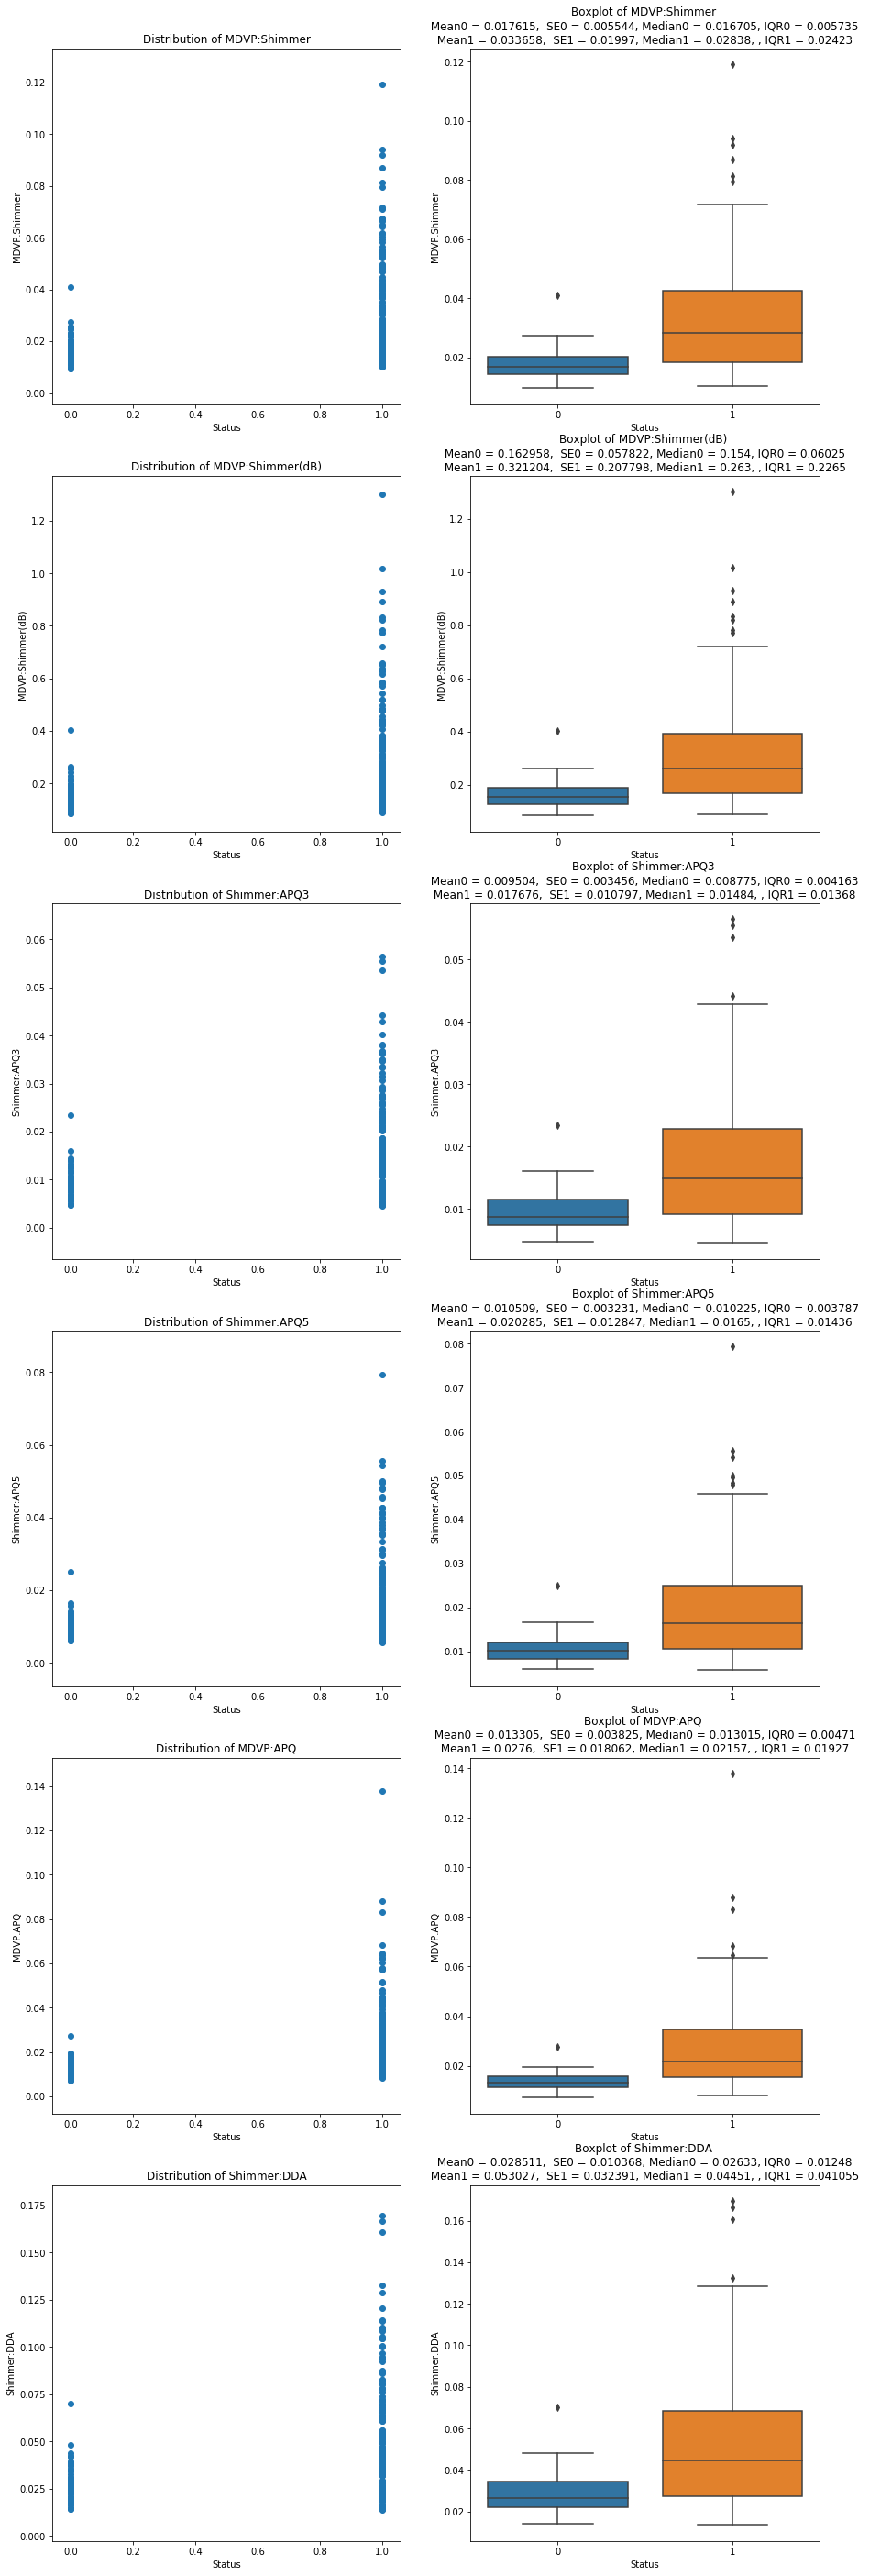

In [62]:
plt.figure(figsize = (15,50))

#To check on the Several measures of variation in amplitude
cols = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA']

i=0 # column counter 
j=1 # plot counter

while i < len(cols):
    if j % 2 != 0:
        plt.subplot(6,2,j)
        plt.scatter(x = pd_data['status'] ,y = pd_data[cols[i]])
        j+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel('Status')
        plt.ylabel(f'{cols[i]}')
    else:
        plt.subplot(6,2,j)
        sns.boxplot(x = pd_data.status,y = pd_data[cols[i]])
        j+=1
        q1, q3 = np.percentile(pd_data[pd_data.status == 0][cols[i]],[25,75])
        IQR0 = q3 - q1
        q1, q3 = np.percentile(pd_data[pd_data.status == 1][cols[i]],[25,75])
        IQR1 = q3 - q1
        plt.title(f'Boxplot of {cols[i]} \n Mean0 = {round(pd_data[pd_data.status == 0][cols[i]].mean(), 6)},  SE0 = {round(pd_data[pd_data.status == 0][cols[i]].std(),6)}, Median0 = {round(pd_data[pd_data.status == 0][cols[i]].median(),6)}, IQR0 = {round(IQR0,6)} \n Mean1 = {round(pd_data[pd_data.status == 1][cols[i]].mean(), 6)},  SE1 = {round(pd_data[pd_data.status == 1][cols[i]].std(),6)}, Median1 = {round(pd_data[pd_data.status == 1][cols[i]].median(),6)}, , IQR1 = {round(IQR1,6)} ')
        plt.xlabel('Status')
        plt.ylabel(f'{cols[i]}')
        i+=1

<ul>
    <li>Lower range of values and more towards the 0 in these cases indicates HD people. PD people clearly have a higher range and higher magnitude of values.
    </li>
    </ul>
    

### Measures of ratio of noise to tonal components in the voice

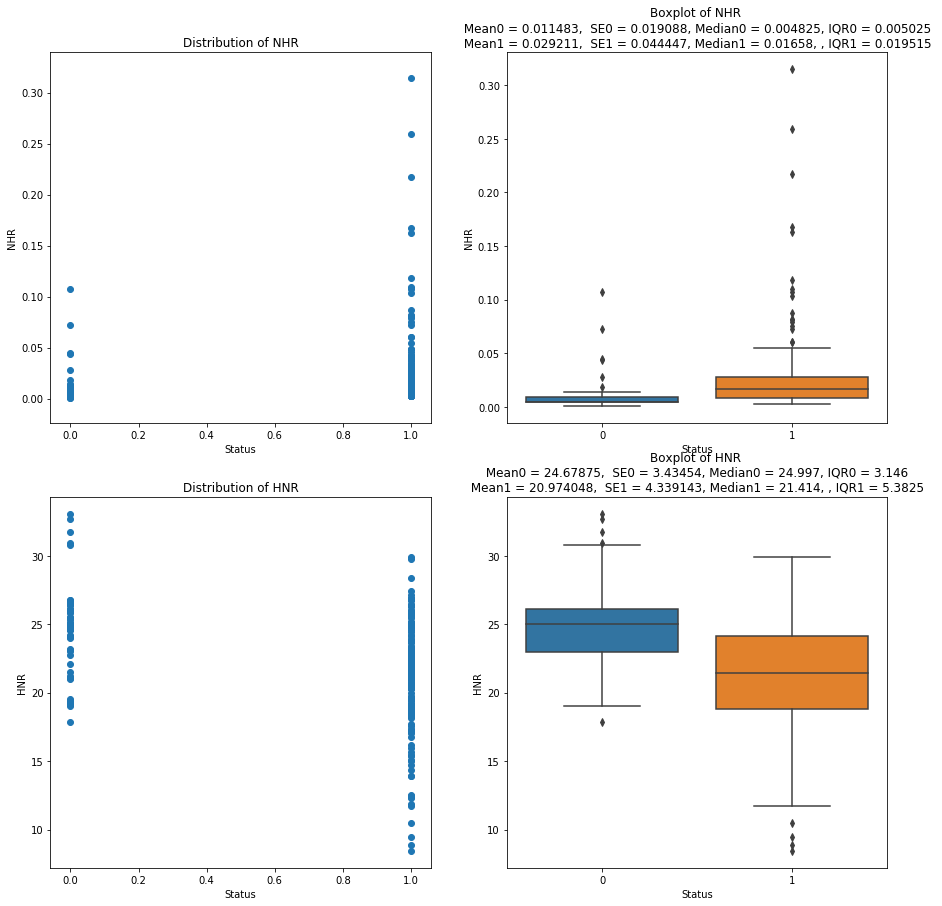

In [63]:
plt.figure(figsize = (15,15))

#To check on the Measures of ratio of noise to tonal components in the voice
cols = ['NHR','HNR']

i=0 # column counter 
j=1 # plot counter

while i < len(cols):
    if j % 2 != 0:
        plt.subplot(2,2,j)
        plt.scatter(x = pd_data['status'] ,y = pd_data[cols[i]])
        j+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel('Status')
        plt.ylabel(f'{cols[i]}')
    else:
        plt.subplot(2,2,j)
        sns.boxplot(x = pd_data.status,y = pd_data[cols[i]])
        j+=1
        q1, q3 = np.percentile(pd_data[pd_data.status == 0][cols[i]],[25,75])
        IQR0 = q3 - q1
        q1, q3 = np.percentile(pd_data[pd_data.status == 1][cols[i]],[25,75])
        IQR1 = q3 - q1
        plt.title(f'Boxplot of {cols[i]} \n Mean0 = {round(pd_data[pd_data.status == 0][cols[i]].mean(), 6)},  SE0 = {round(pd_data[pd_data.status == 0][cols[i]].std(),6)}, Median0 = {round(pd_data[pd_data.status == 0][cols[i]].median(),6)}, IQR0 = {round(IQR0,6)} \n Mean1 = {round(pd_data[pd_data.status == 1][cols[i]].mean(), 6)},  SE1 = {round(pd_data[pd_data.status == 1][cols[i]].std(),6)}, Median1 = {round(pd_data[pd_data.status == 1][cols[i]].median(),6)}, , IQR1 = {round(IQR1,6)} ')
        plt.xlabel('Status')
        plt.ylabel(f'{cols[i]}')
        i+=1

For the distribution of MDVP:Fo, the highest values lies in the range of 110 to 139 Hz. For MDVP:Fhi, the highest values lie in the range of 100 to 200 Hz. For MDVP:Flo, the highest values lie in the range of 70 to 120 Hz.

### Health status of the subject (one) - Parkinson's, (zero) - healthy

Text(0.5, 0, 'Having Parkinsons Disease ?')

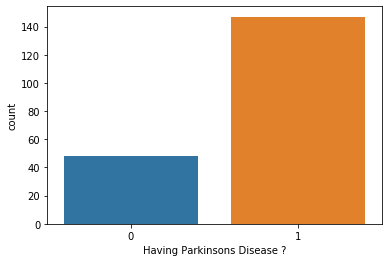

In [82]:

sns.countplot(pd_data['status'],label="Count")
plt.xlabel('Having Parkinsons Disease ?')

### Measures of nonlinear dynamical complexity

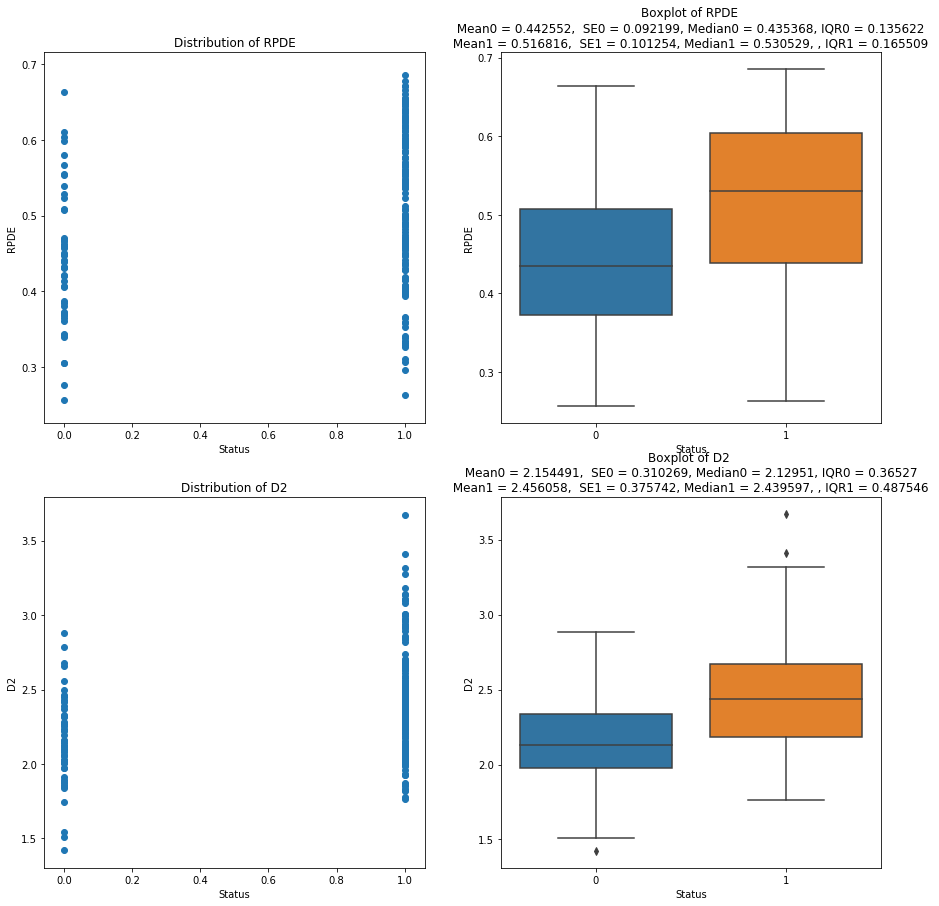

In [64]:
plt.figure(figsize = (15,15))

#To check on the Measures of nonlinear dynamical complexity
cols = ['RPDE','D2']

i=0 # column counter 
j=1 # plot counter

while i < len(cols):
    if j % 2 != 0:
        plt.subplot(2,2,j)
        plt.scatter(x = pd_data['status'] ,y = pd_data[cols[i]])
        j+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel('Status')
        plt.ylabel(f'{cols[i]}')
    else:
        plt.subplot(2,2,j)
        sns.boxplot(x = pd_data.status,y = pd_data[cols[i]])
        j+=1
        q1, q3 = np.percentile(pd_data[pd_data.status == 0][cols[i]],[25,75])
        IQR0 = q3 - q1
        q1, q3 = np.percentile(pd_data[pd_data.status == 1][cols[i]],[25,75])
        IQR1 = q3 - q1
        plt.title(f'Boxplot of {cols[i]} \n Mean0 = {round(pd_data[pd_data.status == 0][cols[i]].mean(), 6)},  SE0 = {round(pd_data[pd_data.status == 0][cols[i]].std(),6)}, Median0 = {round(pd_data[pd_data.status == 0][cols[i]].median(),6)}, IQR0 = {round(IQR0,6)} \n Mean1 = {round(pd_data[pd_data.status == 1][cols[i]].mean(), 6)},  SE1 = {round(pd_data[pd_data.status == 1][cols[i]].std(),6)}, Median1 = {round(pd_data[pd_data.status == 1][cols[i]].median(),6)}, , IQR1 = {round(IQR1,6)} ')
        plt.xlabel('Status')
        plt.ylabel(f'{cols[i]}')
        i+=1

<ul>
    <li>Here the PD patient data lies on a higher range than the HD patient data.
    </li>
    </ul>
    

### Signal fractal scaling exponent

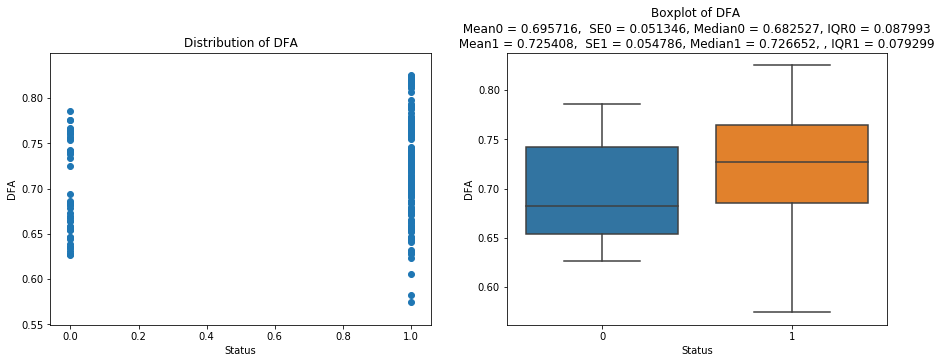

In [65]:
plt.figure(figsize = (15,5))
#To check on the Signal fractal scaling exponent
cols = ['DFA']

i=0 # column counter 
j=1 # plot counter

while i < len(cols):
    if j % 2 != 0:
        plt.subplot(1,2,j)
        plt.scatter(x = pd_data['status'] ,y = pd_data[cols[i]])
        j+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel('Status')
        plt.ylabel(f'{cols[i]}')
    else:
        plt.subplot(1,2,j)
        sns.boxplot(x = pd_data.status,y = pd_data[cols[i]])
        j+=1
        q1, q3 = np.percentile(pd_data[pd_data.status == 0][cols[i]],[25,75])
        IQR0 = q3 - q1
        q1, q3 = np.percentile(pd_data[pd_data.status == 1][cols[i]],[25,75])
        IQR1 = q3 - q1
        plt.title(f'Boxplot of {cols[i]} \n Mean0 = {round(pd_data[pd_data.status == 0][cols[i]].mean(), 6)},  SE0 = {round(pd_data[pd_data.status == 0][cols[i]].std(),6)}, Median0 = {round(pd_data[pd_data.status == 0][cols[i]].median(),6)}, IQR0 = {round(IQR0,6)} \n Mean1 = {round(pd_data[pd_data.status == 1][cols[i]].mean(), 6)},  SE1 = {round(pd_data[pd_data.status == 1][cols[i]].std(),6)}, Median1 = {round(pd_data[pd_data.status == 1][cols[i]].median(),6)}, , IQR1 = {round(IQR1,6)} ')
        plt.xlabel('Status')
        plt.ylabel(f'{cols[i]}')
        i+=1

<ul>
    <li>Here PD patients have a higher range of values for DFA, but the range is short for HD patients.
    </li>
    </ul>

### Nonlinear measures of fundamental frequency variation

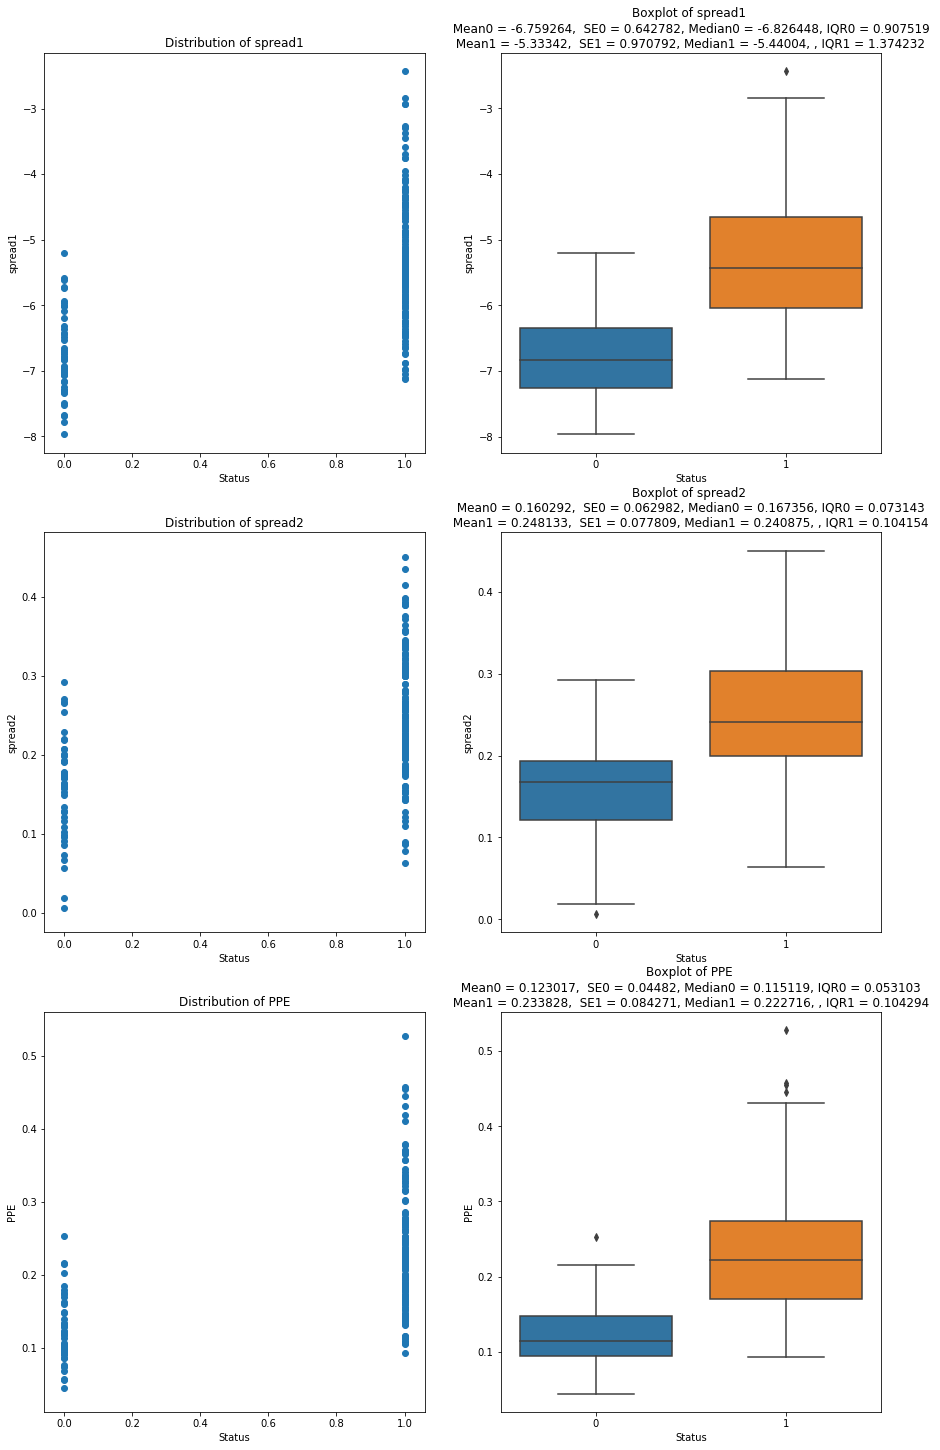

In [66]:
plt.figure(figsize = (15,25))

#To check on the Nonlinear measures of fundamental frequency variation
cols = ['spread1','spread2','PPE']

i=0 # column counter 
j=1 # plot counter

while i < len(cols):
    if j % 2 != 0:
        plt.subplot(3,2,j)
        plt.scatter(x = pd_data['status'] ,y = pd_data[cols[i]])
        j+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel('Status')
        plt.ylabel(f'{cols[i]}')
    else:
        plt.subplot(3,2,j)
        sns.boxplot(x = pd_data.status,y = pd_data[cols[i]])
        j+=1
        q1, q3 = np.percentile(pd_data[pd_data.status == 0][cols[i]],[25,75])
        IQR0 = q3 - q1
        q1, q3 = np.percentile(pd_data[pd_data.status == 1][cols[i]],[25,75])
        IQR1 = q3 - q1
        plt.title(f'Boxplot of {cols[i]} \n Mean0 = {round(pd_data[pd_data.status == 0][cols[i]].mean(), 6)},  SE0 = {round(pd_data[pd_data.status == 0][cols[i]].std(),6)}, Median0 = {round(pd_data[pd_data.status == 0][cols[i]].median(),6)}, IQR0 = {round(IQR0,6)} \n Mean1 = {round(pd_data[pd_data.status == 1][cols[i]].mean(), 6)},  SE1 = {round(pd_data[pd_data.status == 1][cols[i]].std(),6)}, Median1 = {round(pd_data[pd_data.status == 1][cols[i]].median(),6)}, , IQR1 = {round(IQR1,6)} ')
        plt.xlabel('Status')
        plt.ylabel(f'{cols[i]}')
        i+=1

<ul>
    <li>Here for all the cases of Nonlinear measures of fundamental frequency variation,PD patients have a higher range and higher values than HD patients.
    </li>
    </ul>
    

In [11]:
#Checking for missing values
np.any(np.isnan(pd_data.drop(columns = 'name')))

False

In [12]:
# Checking for null values
pd_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [13]:
#Checking if all the values are finite
np.all(np.isfinite(pd_data.drop(columns = 'name')))

True

In [35]:
X = pd_data.drop( columns=['name','status']) # removing the identification and target column
y = pd_data.loc[:,'status'] # capturing the target column

In [36]:
#splitting the data for training and test 70-30
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.30 , random_state = 1, stratify = y)

In [37]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    from sklearn import metrics
    
    model.fit(X_train, y_train)   # fit the model with the train data

    y_pred = model.predict(X_test)  # make predictions on the test set

    score_train = round(model.score(X_train, y_train), 5) # compute accuracy score for training set
    score_test = round(model.score(X_test, y_test), 10)   # compute accuracy score for test set


    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()  # compute the confusion matrix from the predictions and actuals

    recall = round(tp/(tp+fn), 5)   
    precision = round(tp/(tp+fp), 5)  
    specificity =round(tn/(tn+fp),5) 
    f1_score =  round(2*precision*recall/(precision + recall), 5)
    
    return score_train,score_test, recall, precision, specificity, f1_score  # return all the metrics
    

<br>
<br>

#### Models should not to overfit or underfit training data

In [41]:
lr = LogisticRegression(solver = 'liblinear')  # 
lr_accuracy_train,lr_accuracy_test, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn_accuracy_train,knn_accuracy_test, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train, X_test, y_train, y_test )

nb = GaussianNB()
nb_accuracy_train,nb_accuracy_test, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb, X_train, X_test, y_train, y_test )

svm = SVC(C = 1, gamma = 'auto')
svm_accuracy_train,svm_accuracy_test, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm, X_train, X_test, y_train, y_test )

In [42]:
    result0 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes", 'SVM'],
                          'Accuracy on Train': [ lr_accuracy_train ,  knn_accuracy_train ,  nb_accuracy_train ,  svm_accuracy_train ],
                          'Accuracy on Test': [ lr_accuracy_test ,  knn_accuracy_test ,  nb_accuracy_test ,  svm_accuracy_test ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                          'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
    result0

,Model,Accuracy on Train,Accuracy on Test,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.85294,0.881356,0.95455,0.89362,0.66667,0.92308
1,KNN,0.94118,0.881356,0.90909,0.93023,0.80000,0.91954
2,Naive Bayes,0.72059,0.694915,0.63636,0.93333,0.86667,0.75675
3,SVM,1.00000,0.745763,0.97727,0.75439,0.06667,0.85149


<ul>
    <li>Logistic Regression is underfitting data
    </li>
    <li>KNN does well across all scores
    </li>
    <li>This classification is not for Naive Bayes it looks like. Recall is poor, so is f1 score compared to others
    </li>
    <li>SVM clearly overfits the training data. Specificity is poor.
    </li>
    </ul>

## Lets now scale the data

In [43]:
scale = StandardScaler() # Standard scaling
scale.fit(X_train.loc[:,:])# fitting on training data so the data integrity in test is maintained

X_train_scaled = scale.transform(X_train.loc[:,:])
X_test_scaled = scale.transform(X_test.loc[:,:])


In [44]:
X_train.loc[:,:] = X_train_scaled[:,:]
X_test.loc[:,:] = X_test_scaled[:,:]

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
X_train.shape # checking the dimensions

(136, 22)

In [46]:
X_test.shape # checking the dimensions

(59, 22)

In [47]:
X_test.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
179,-0.154444,-0.447907,0.525243,-0.526306,-0.424856,-0.478338,-0.456103,-0.478569,-0.859421,-0.828320,...,-0.742675,-0.875547,-0.544804,0.438336,-0.950916,1.094199,-0.092702,0.151495,1.123747,-0.224763
184,-0.930857,0.188964,-0.337738,-0.219011,0.194109,-0.274555,-0.020871,-0.274760,-0.669814,-0.658400,...,-0.431418,-0.789248,-0.364260,0.080480,1.631050,-1.146001,0.380237,-0.240779,-0.652595,0.437817
51,-0.695266,-0.672896,-0.015498,-0.402504,-0.115373,-0.743982,-0.690750,-0.744248,-0.539013,-0.541581,...,-0.521070,-0.449488,-0.563452,0.739983,0.109776,0.763446,-0.995436,0.738969,0.110797,-1.187833
35,1.168423,0.116692,1.998440,-0.955193,-1.043821,-0.838596,-0.895120,-0.840086,-1.000114,-0.955760,...,-0.935868,-1.017227,-0.659234,2.240828,-1.478776,0.439385,-2.000254,-0.661553,0.148079,-1.725045
91,-0.059870,-0.371848,0.821135,-0.466616,-0.424856,-0.405558,-0.471242,-0.405780,2.717824,2.575387,...,2.052322,2.891375,-0.228922,-0.461678,0.046848,-0.082396,-0.739136,-0.236316,-0.102400,-0.875529


In [53]:
# creating odd list of K nearest neighbors for KNN
myList = list(range(3,20)) # not using 1 as it causes overfitting on training data, thus poor prediction of test data or future data

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
neighbors

[3, 5, 7, 9, 11, 13, 15, 17, 19]

In [54]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    # predict the response
    y_predict = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_predict)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


In [55]:
MSE

[0.05084745762711862,
 0.05084745762711862,
 0.06779661016949157,
 0.06779661016949157,
 0.0847457627118644,
 0.13559322033898302,
 0.11864406779661019,
 0.13559322033898302,
 0.13559322033898302]

## Training & Evaluation

In [56]:
lr = LogisticRegression(solver = 'liblinear')  # 
lr_accuracy_train,lr_accuracy_test, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn_accuracy_train,knn_accuracy_test, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train, X_test, y_train, y_test )

nb = GaussianNB()
nb_accuracy_train,nb_accuracy_test, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb, X_train, X_test, y_train, y_test )

svm = SVC(C = 5, gamma = 'auto')
svm_accuracy_train,svm_accuracy_test, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm, X_train, X_test, y_train, y_test )

In [57]:
    result1 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes", 'SVM'],
                          'Accuracy on Train': [ lr_accuracy_train ,  knn_accuracy_train ,  nb_accuracy_train ,  svm_accuracy_train ],
                          'Accuracy on Test': [ lr_accuracy_test ,  knn_accuracy_test ,  nb_accuracy_test ,  svm_accuracy_test ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                          'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
    result1

,Model,Accuracy on Train,Accuracy on Test,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.85294,0.847458,0.88636,0.90698,0.73333,0.89655
1,KNN,0.97059,0.949153,0.95455,0.97674,0.93333,0.96552
2,Naive Bayes,0.69118,0.711864,0.65909,0.93548,0.86667,0.77333
3,SVM,0.96324,0.932203,1.00000,0.91667,0.73333,0.95652


<ul>
<li>Since KNN and SVM is distance based models, they do good on scaled data.Accuracy has improved for both, other data looks good too.
</li>
<li>Logistic Regression has stopped underfitting
</li>
<li>Naive Bayes does not do good here compared to other models.
</li>
</ul>

## Dropping columns having less correlation with status b/w 0.3 & -0.3

In [60]:
X_train2 = X_train.drop(columns = ['MDVP:Fhi(Hz)','MDVP:Jitter(%)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','NHR','DFA'])
X_test2 = X_test.drop(columns = ['MDVP:Fhi(Hz)','MDVP:Jitter(%)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','NHR','DFA'])

In [61]:
lr = LogisticRegression(solver = 'liblinear')  # 
lr_accuracy_train,lr_accuracy_test, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train2, X_test2, y_train, y_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn_accuracy_train,knn_accuracy_test, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train2, X_test2, y_train, y_test )

nb = GaussianNB()
nb_accuracy_train,nb_accuracy_test, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb, X_train2, X_test2, y_train, y_test )

svm = SVC(C = 5, gamma = 'auto')
svm_accuracy_train,svm_accuracy_test, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm, X_train2, X_test2, y_train, y_test )

In [62]:
    result2 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes", 'SVM'],
                          'Accuracy on Train': [ lr_accuracy_train ,  knn_accuracy_train ,  nb_accuracy_train ,  svm_accuracy_train ],
                          'Accuracy on Test': [ lr_accuracy_test ,  knn_accuracy_test ,  nb_accuracy_test ,  svm_accuracy_test ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                          'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
    result2

,Model,Accuracy on Train,Accuracy on Test,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.86029,0.847458,0.88636,0.90698,0.73333,0.89655
1,KNN,0.94118,0.932203,0.95455,0.95455,0.86667,0.95455
2,Naive Bayes,0.74265,0.694915,0.65909,0.90625,0.80000,0.76316
3,SVM,0.95588,0.881356,0.95455,0.89362,0.66667,0.92308


Not much difference except training accuracy increased for Naive Bayes and Logistic Regression.
Test accuracy decresed for SVM and KNN both.

## Dropping columns having less correlation with status b/w 0.2 & -0.2

In [63]:
X_train2 = X_train.drop(columns = ['MDVP:Fhi(Hz)','NHR'])
X_test2 = X_test.drop(columns = ['MDVP:Fhi(Hz)','NHR'])

In [64]:
lr = LogisticRegression(solver = 'liblinear')  # 
lr_accuracy_train,lr_accuracy_test, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train2, X_test2, y_train, y_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn_accuracy_train,knn_accuracy_test, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train2, X_test2, y_train, y_test )

nb = GaussianNB()
nb_accuracy_train,nb_accuracy_test, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb, X_train2, X_test2, y_train, y_test )

svm = SVC(C = 5, gamma = 'auto')
svm_accuracy_train,svm_accuracy_test, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm, X_train2, X_test2, y_train, y_test )

In [65]:
    result3 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes", 'SVM'],
                          'Accuracy on Train': [ lr_accuracy_train ,  knn_accuracy_train ,  nb_accuracy_train ,  svm_accuracy_train ],
                          'Accuracy on Test': [ lr_accuracy_test ,  knn_accuracy_test ,  nb_accuracy_test ,  svm_accuracy_test ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                          'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
    result3

,Model,Accuracy on Train,Accuracy on Test,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.84559,0.847458,0.88636,0.90698,0.73333,0.89655
1,KNN,0.97794,0.932203,0.95455,0.95455,0.86667,0.95455
2,Naive Bayes,0.69853,0.745763,0.70455,0.93939,0.86667,0.80520
3,SVM,0.97059,0.898305,0.95455,0.91304,0.73333,0.93333


Lets try upsampling

## Upsampling

In [66]:
y_train.value_counts() # to check the imbalance in training data

1    103
0     33
Name: status, dtype: int64

In [67]:
# We do upsampling only from the train dataset to preserve the sanctity of the test data

extra_samples = y_train[y_train == 0].sample(50,replace = True, random_state=1).index # Generate duplicate samples
y_train = y_train.append(y_train.loc[extra_samples])  # use the index of the duplicate samples to append to the y_train

extra_samples = X_train.loc[extra_samples]   # use the same index to generate duplicate rows in X_train
X_train = X_train.append(extra_samples)  # append these duplicate rows to X_train

In [68]:
lr = LogisticRegression(solver = 'liblinear')  # 
lr_accuracy_train,lr_accuracy_test, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn_accuracy_train,knn_accuracy_test, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train, X_test, y_train, y_test )

nb = GaussianNB()
nb_accuracy_train,nb_accuracy_test, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb, X_train, X_test, y_train, y_test )

svm = SVC(C = 5, gamma = 'auto')
svm_accuracy_train,svm_accuracy_test, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm, X_train, X_test, y_train, y_test )

In [69]:
    result4 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes", 'SVM'],
                          'Accuracy on Train': [ lr_accuracy_train ,  knn_accuracy_train ,  nb_accuracy_train ,  svm_accuracy_train ],
                          'Accuracy on Test': [ lr_accuracy_test ,  knn_accuracy_test ,  nb_accuracy_test ,  svm_accuracy_test ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                          'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
    result4

,Model,Accuracy on Train,Accuracy on Test,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.88172,0.796610,0.79545,0.92105,0.80000,0.85365
1,KNN,0.96237,0.915254,0.90909,0.97561,0.93333,0.94118
2,Naive Bayes,0.74731,0.711864,0.65909,0.93548,0.86667,0.77333
3,SVM,0.96774,0.898305,0.93182,0.93182,0.80000,0.93182


Neither upsampling helps

<br>
<br>

# Using Ensemble Techniques

In [231]:
X = pd_data.drop( columns=['name','status'])
y = pd_data.loc[:,'status']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.30 , random_state = 1, stratify = y)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.30 , random_state = 1, stratify = y)

scale = StandardScaler()

scale.fit(X_train.loc[:,:])

X_train_scaled = scale.transform(X_train.loc[:,:])
X_test_scaled = scale.transform(X_test.loc[:,:])

In [73]:
X_train.loc[:,:] = X_train_scaled[:,:]
X_test.loc[:,:] = X_test_scaled[:,:]

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [149]:
X = pd_data.drop( columns=['name','status']) # removing the identification and target column
y = pd_data.loc[:,'status'] # capturing the target column

#splitting the data for training and test 70-30
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.30 , random_state = 1, stratify = y)

## Random Forrest

In [150]:
rfcl = RandomForestClassifier(criterion='gini' ,class_weight={0:.5,1:.5})
rfcl = rfcl.fit(X_train, y_train)

In [151]:
y_pred = rfcl.predict(X_test)
print(f'Training Accuracy - {rfcl.score(X_train, y_train)}')
print(f'Test Accuracy - {rfcl.score(X_test, y_test)}')


Training Accuracy - 1.0
Test Accuracy - 0.9322033898305084


Clearly overfitting

In [152]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0]) # confusion matrix

df_cm = pd.DataFrame(cm, index = [i for i in ["Parkinsons","Healthy"]],
                  columns = [i for i in ["Predict Parkinsons","Predict Healthy"]])
print(df_cm)

            Predict Parkinsons  Predict Healthy
Parkinsons                  43                1
Healthy                      3               12


In [153]:
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)} ')
print(f'Precision Score : {precision_score(y_test, y_pred)}')
print(f'Recall Score : {recall_score(y_test, y_pred)}')
print(f'F1 Score : {f1_score(y_test, y_pred)}')

Accuracy Score : 0.9322033898305084 
Precision Score : 0.9347826086956522
Recall Score : 0.9772727272727273
F1 Score : 0.9555555555555557


In [126]:
rfcl = RandomForestClassifier(n_estimators=50,class_weight={0:.5,1:.5} ,max_depth=5, min_samples_leaf=5) # to stop overfit
rfcl = rfcl.fit(X_train, y_train)

y_pred = rfcl.predict(X_test)
print(f'Training Accuracy - {rfcl.score(X_train, y_train)}')
print(f'Test Accuracy - {rfcl.score(X_test, y_test)}')

cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Parkinsons","Healthy"]],
                  columns = [i for i in ["Predict Parkinsons","Predict Healthy"]])
print()
print('Confusion Matrix')
print(df_cm)
print()
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)} ')
print(f'Precision Score : {precision_score(y_test, y_pred)}')
print(f'Recall Score : {recall_score(y_test, y_pred)}')
print(f'F1 Score : {f1_score(y_test, y_pred)}')

Training Accuracy - 0.9558823529411765
Test Accuracy - 0.9322033898305084
Confusion Matrix
            Predict Parkinsons  Predict Healthy
Parkinsons                  43                1
Healthy                      3               12
Accuracy Score : 0.9322033898305084 
Precision Score : 0.9347826086956522
Recall Score : 0.9772727272727273
F1 Score : 0.9555555555555557


This is a very good score. Three Type 1 errors and one Type 2 errors.

<br>
<br>

## Bagging

In [154]:
bcl = BaggingClassifier( n_estimators=50,max_samples= 0.3)
bcl.fit(X_train, y_train)

y_pred = bcl.predict(X_test)
print(f'Training Accuracy - {bcl.score(X_train, y_train)}')
print(f'Test Accuracy - {bcl.score(X_test, y_test)}')

cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Parkinsons","Healthy"]],
                  columns = [i for i in ["Predict Parkinsons","Predict Healthy"]])
print()
print('Confusion Matrix')
print(df_cm)
print()
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)} ')
print(f'Precision Score : {precision_score(y_test, y_pred)}')
print(f'Recall Score : {recall_score(y_test, y_pred)}')
print(f'F1 Score : {f1_score(y_test, y_pred)}')

Training Accuracy - 0.9338235294117647
Test Accuracy - 0.9152542372881356

Confusion Matrix
            Predict Parkinsons  Predict Healthy
Parkinsons                  44                0
Healthy                      5               10

Accuracy Score : 0.9152542372881356 
Precision Score : 0.8979591836734694
Recall Score : 1.0
F1 Score : 0.9462365591397849


Bagging with Decision tree as base estimator performed quite well with recall at 100% and precision at around 90%, with five Type 1 errors

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.30 , random_state = 1, stratify = y)

scale = StandardScaler()

scale.fit(X_train.loc[:,:])

X_train_scaled = scale.transform(X_train.loc[:,:])
X_test_scaled = scale.transform(X_test.loc[:,:])

X_train.loc[:,:] = X_train_scaled[:,:]
X_test.loc[:,:] = X_test_scaled[:,:]

bcl = BaggingClassifier( base_estimator=SVC(C = 5, gamma = 'auto') ,n_estimators=50,max_samples= 0.3)
bcl.fit(X_train, y_train)

y_pred = bcl.predict(X_test)
print(f'Training Accuracy - {bcl.score(X_train, y_train)}')
print(f'Test Accuracy - {bcl.score(X_test, y_test)}')

cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Parkinsons","Healthy"]],
                  columns = [i for i in ["Predict Parkinsons","Predict Healthy"]])
print()
print('Confusion Matrix')
print(df_cm)
print()
print(f'Accuracy Score : {accuracy_score(y_test, y_pred)} ')
print(f'Precision Score : {precision_score(y_test, y_pred)}')
print(f'Recall Score : {recall_score(y_test, y_pred)}')
print(f'F1 Score : {f1_score(y_test, y_pred)}')

Training Accuracy - 0.8897058823529411
Test Accuracy - 0.8983050847457628

Confusion Matrix
            Predict Parkinsons  Predict Healthy
Parkinsons                  44                0
Healthy                      6                9

Accuracy Score : 0.8983050847457628 
Precision Score : 0.88
Recall Score : 1.0
F1 Score : 0.9361702127659575


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # 

Bagging with SVM as base estimator performed quite well with recall at 100% and precision at around 90% but overall accuracy was below 90% with six Type 1 errors

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.30 , random_state = 1, stratify = y)

scale = StandardScaler()

scale.fit(X_train.loc[:,:])

X_train_scaled = scale.transform(X_train.loc[:,:])
X_test_scaled = scale.transform(X_test.loc[:,:])

X_train.loc[:,:] = X_train_scaled[:,:]
X_test.loc[:,:] = X_test_scaled[:,:]

bcl = BaggingClassifier( base_estimator=KNeighborsClassifier(n_neighbors=3) ,n_estimators=50,max_samples= 0.3)
bcl.fit(X_train, y_train)

y_pred = bcl.predict(X_test)
print(f'Training Accuracy - {bcl.score(X_train, y_train)}')
print(f'Test Accuracy - {bcl.score(X_test, y_test)}')

cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Parkinsons","Healthy"]],
                  columns = [i for i in ["Predict Parkinsons","Predict Healthy"]])
print()
print('Confusion Matrix')
print(df_cm)
print()

print(f'Accuracy Score : {accuracy_score(y_test, y_pred)} ')
print(f'Precision Score : {precision_score(y_test, y_pred)}')
print(f'Recall Score : {recall_score(y_test, y_pred)}')
print(f'F1 Score : {f1_score(y_test, y_pred)}')

Training Accuracy - 0.9044117647058824
Test Accuracy - 0.8983050847457628

Confusion Matrix
            Predict Parkinsons  Predict Healthy
Parkinsons                  43                1
Healthy                      5               10

Accuracy Score : 0.8983050847457628 
Precision Score : 0.8958333333333334
Recall Score : 0.9772727272727273
F1 Score : 0.9347826086956522


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # 

Bagging with KNN of 3 neighbors performs similar to SVM Bagging too, but has one Type 2 error along with five Type 1 error.

<br>
<br>

## AdaBoosting

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.30 , random_state = 1, stratify = y)

bcl = AdaBoostClassifier( base_estimator=DecisionTreeClassifier(max_depth=5))
bcl.fit(X_train, y_train)

y_pred = bcl.predict(X_test)
print(f'Training Accuracy - {bcl.score(X_train, y_train)}')
print(f'Test Accuracy - {bcl.score(X_test, y_test)}')

cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Parkinsons","Healthy"]],
                  columns = [i for i in ["Predict Parkinsons","Predict Healthy"]])
print()
print('Confusion Matrix')
print(df_cm)
print()


print(f'Accuracy Score : {accuracy_score(y_test, y_pred)} ')
print(f'Precision Score : {precision_score(y_test, y_pred)}')
print(f'Recall Score : {recall_score(y_test, y_pred)}')
print(f'F1 Score : {f1_score(y_test, y_pred)}')

Training Accuracy - 1.0
Test Accuracy - 0.9661016949152542

Confusion Matrix
            Predict Parkinsons  Predict Healthy
Parkinsons                  44                0
Healthy                      2               13

Accuracy Score : 0.9661016949152542 
Precision Score : 0.9565217391304348
Recall Score : 1.0
F1 Score : 0.9777777777777777


Adaboost overfits the training data  with two Type 1 errors.

<br>
<br>

## Gradient Boosting

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.30 , random_state = 1, stratify = y)

scale = StandardScaler()

scale.fit(X_train.loc[:,:])

X_train_scaled = scale.transform(X_train.loc[:,:])
X_test_scaled = scale.transform(X_test.loc[:,:])

X_train.loc[:,:] = X_train_scaled[:,:]
X_test.loc[:,:] = X_test_scaled[:,:]

bcl = GradientBoostingClassifier(n_estimators = 50, learning_rate=0.05)
bcl.fit(X_train, y_train)

y_pred = bcl.predict(X_test)
print(f'Training Accuracy - {bcl.score(X_train, y_train)}')
print(f'Test Accuracy - {bcl.score(X_test, y_test)}')

cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Parkinsons","Healthy"]],
                  columns = [i for i in ["Predict Parkinsons","Predict Healthy"]])

print()
print('Confusion Matrix')
print(df_cm)
print()


print(f'Accuracy Score : {accuracy_score(y_test, y_pred)} ')
print(f'Precision Score : {precision_score(y_test, y_pred)}')
print(f'Recall Score : {recall_score(y_test, y_pred)}')
print(f'F1 Score : {f1_score(y_test, y_pred)}')

Training Accuracy - 1.0
Test Accuracy - 0.9322033898305084

Confusion Matrix
            Predict Parkinsons  Predict Healthy
Parkinsons                  43                1
Healthy                      3               12

Accuracy Score : 0.9322033898305084 
Precision Score : 0.9347826086956522
Recall Score : 0.9772727272727273
F1 Score : 0.9555555555555557


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # 

Gradient Boost clearly overfits with three Type 1 errors and one Type 2 error.

<br>
<br>
<br>

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.30 , random_state = 1, stratify = y)

scale = StandardScaler()

scale.fit(X_train.loc[:,:])

X_train_scaled = scale.transform(X_train.loc[:,:])
X_test_scaled = scale.transform(X_test.loc[:,:])

X_train.loc[:,:] = X_train_scaled[:,:]
X_test.loc[:,:] = X_test_scaled[:,:]

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # 

<br>
<br>

# Using Meta-classifier

In [209]:
# Using only traditional Supervised learners in meta classification
bestimators = [
    ('KNN',KNeighborsClassifier(n_neighbors=3, weights='distance')),
    ('SVM',SVC(C = 5, gamma = 'auto'))
    #('BC',BaggingClassifier( n_estimators=50,max_samples= 0.3))
    #('SVM',SVC(C = 30, gamma = 'auto'))
]


meta = StackingClassifier(estimators= bestimators)
                          #final_estimator=KNeighborsClassifier(n_neighbors=3, weights='distance'))
#meta = StackingClassifier(estimators= bestimators, 
                          #final_estimator=GradientBoostingClassifier(n_estimators = 50, learning_rate=0.05))

In [210]:
meta.fit(X_train, y_train)

print(f'Train Accuracy - {meta.score(X_train, y_train)}')
print(f'Train Accuracy - {meta.score(X_test, y_test)}')

Train Accuracy - 0.9926470588235294
Train Accuracy - 0.9322033898305084


In [211]:
y_predict = meta.predict(X_test)
y_predict

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [212]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        44
           0       1.00      0.73      0.85        15

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59



In [213]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Parkinsons","Healthy"]],
                  columns = [i for i in ["Predict Parkinsons","Predict Healthy"]])

In [214]:
df_cm

,Predict Parkinsons,Predict Healthy
Parkinsons,44,0
Healthy,4,11


Here it produced four Type 1 errors

<br>
<br>
<br>

In [295]:
#Using Random Forrest, AdaBoost & SVM as base estimators, and KNN as the meta classifier

bestimators = [
    ('RF',RandomForestClassifier(n_estimators=50,class_weight={0:.5,1:.5} ,max_depth=5, min_samples_leaf=5)),
    ('ADC',AdaBoostClassifier( base_estimator=DecisionTreeClassifier(max_depth=5))),
    ('SVM',SVC(C = 5, gamma = 'auto'))
    #('BC',BaggingClassifier( n_estimators=50,max_samples= 0.3))
    #('SVM',SVC(C = 30, gamma = 'auto'))
]


meta = StackingClassifier(estimators= bestimators,
                          final_estimator=KNeighborsClassifier(n_neighbors=3, weights='distance'))
#meta = StackingClassifier(estimators= bestimators, 
                          #final_estimator=GradientBoostingClassifier(n_estimators = 50, learning_rate=0.05))

In [296]:
meta.fit(X_train, y_train)

print(f'Train Accuracy - {meta.score(X_train, y_train)}')
print(f'Train Accuracy - {meta.score(X_test, y_test)}')

Train Accuracy - 0.9705882352941176
Train Accuracy - 0.9661016949152542


In [297]:
y_predict = meta.predict(X_test)
y_predict

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

In [299]:
#Confusion Matrix
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Parkinsons","Healthy"]],
                  columns = [i for i in ["Predict Parkinsons","Predict Healthy"]])

In [300]:
df_cm

,Predict Parkinsons,Predict Healthy
Parkinsons,43,1
Healthy,1,14


This meta classification gives one Type 1 error and one Type 2 error.

## Conclusion

After going through all classifications, this final meta classification should be our go to model, with accuracy, precision, recall and f1 score all above 0.95

## Base Estimators

<ul>
    <li>Random Forrest with 50 decision trees as estimators, 0.5 weightage given to each target type with a maximum depth of 5 and minimum sample leaves of 5
    </li>
    <li>Ada Booster with depth 5 decision trees
    </li>
    <li>SVM  with C = 5 and gamma set to auto
    </li>
</ul>

## Meta Classifier

KNN with 3 neighbors and weights set to distance

Feature Engineering, model evaluation and regularization techniques are needed to improve the model.